In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVC, SVR, LinearSVC, LinearSVR

from tensorflow.keras.optimizers import SGD, Adam
import matplotlib .pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from datetime import datetime
import cv2
import zipfile
import shutil
import os
import glob
import math

from tqdm import tqdm_notebook
from tensorflow.keras.applications import Xception, ResNet50
from tensorflow.keras.applications import InceptionV3, MobileNet

In [2]:
import matplotlib.font_manager as fm # 폰트연결 시켜주는 모듈
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family = font_name)

# 마이너스 사인 해결
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 워닝소리 미전시
import warnings
warnings.filterwarnings("ignore") 

# 1. 데이터 재탐색

In [3]:
farm1_outer = pd.read_csv("tomato_farm_set/tom1.csv", encoding = "utf-8", index_col = 0)
round(farm1_outer.isnull().sum()/len(farm1_outer)*100, 2) # 총 3438개

날짜           0.00
J/Day        0.00
평균온도        86.59
EC급액        86.59
EC배액        86.59
pH급액        86.59
pH배액        86.59
내부이산화탄소     86.59
온도토양       100.00
온도급액       100.00
온도배액       100.00
dtype: float64

In [4]:
farm1 = pd.read_csv("tomato_farm_set/tom1_inner.csv", encoding = "utf-8", index_col = 0)
farm1.isnull().sum() # 총 461개

날짜         0
EC급액       0
EC배액       0
pH급액       0
pH배액       0
내부이산화탄소    0
평균온도       0
J/Day      0
dtype: int64

In [5]:
farm2 = pd.read_csv("tomato_farm_set/tom2.csv", encoding = "utf-8", index_col = 0)
round(farm2.isnull().sum()/len(farm2)*100, 2) # 총 1359개

날짜           0.0
J/Day      100.0
평균온도         0.0
EC급액         0.0
EC배액         0.0
pH급액         0.0
pH배액         0.0
내부이산화탄소      0.0
온도토양         0.0
온도급액       100.0
온도배액       100.0
dtype: float64

In [6]:
farm3 = pd.read_csv("tomato_farm_set/tom3.csv", encoding = "utf-8", index_col = 0)
round(farm3.isnull().sum()/len(farm3)*100, 2) # 총 18888개 / 버린다.

날짜           0.0
J/Day       70.9
평균온도        70.9
EC급액       100.0
EC배액       100.0
pH급액       100.0
pH배액       100.0
내부이산화탄소     70.9
온도토양       100.0
온도급액       100.0
온도배액       100.0
dtype: float64

In [7]:
farm4 = pd.read_csv("tomato_farm_set/tom4.csv", encoding = "utf-8", index_col = 0)
round(farm4.isnull().sum()/len(farm4)*100, 2) # 2799개 / 버리자

날짜          0.00
J/Day       0.46
평균온도       98.43
EC급액       98.43
EC배액       98.43
pH급액       98.43
pH배액       98.43
내부이산화탄소    98.43
온도토양       98.43
온도급액       98.43
온도배액       98.43
dtype: float64

In [8]:
farm5 = pd.read_csv("tomato_farm_set/tom5.csv", encoding = "utf-8", index_col = 0)
round(farm5.isnull().sum()/len(farm5)*100, 2) # 총 119개

날짜           0.0
J/Day      100.0
평균온도         0.0
EC급액         0.0
EC배액         0.0
pH급액         0.0
pH배액         0.0
내부이산화탄소      0.0
온도토양         0.0
온도급액         0.0
온도배액         0.0
dtype: float64

In [9]:
farm6 = pd.read_csv("tomato_farm_set/tom6.csv", encoding = "utf-8", index_col = 0)
round(farm6.isnull().sum()/len(farm6)*100, 2) # 총 1370개

날짜          0.00
J/Day      15.33
평균온도       67.81
EC급액       67.81
EC배액       67.81
pH급액       67.81
pH배액       67.81
내부이산화탄소    67.81
온도토양       67.81
온도급액       67.81
온도배액       67.81
dtype: float64

In [10]:
# 21년도 파괴데이터
dst_tom_21 = []
for i in range(45, 53):
    try:
        dst_tom_df = pd.read_excel("tomato_farm_set/destroy_tomato.xlsx", 
                      sheet_name = "{}주차".format(i), 
                      skiprows = 3)
        print("{}주차".format(i), dst_tom_df.head())
        dst_tom_df = dst_tom_df.loc[1:100]
        dst_tom_df["주차"] = "{}".format(i)
        dst_tom_21.append(dst_tom_df[["주차", "과중", "당도", "산도"]])          
        
    except Exception as e: 
        print(e)

45주차    수집항목   과폭   과고   과중      당도    산도    경도    수분율
0  개체번호   cm   cm    g  Brix %  0-14   kgf      %
1     1  7.4  5.8  205     4.1     4  2.65  71.25
2     2  7.9  6.2  210     4.7     4   2.7   72.5
3     3  7.7    6  205     4.7     4   2.7  71.25
4     4  7.8  5.7  206     4.7   4.5  2.72     75
46주차    수집항목   과폭   과고   과중      당도    산도    경도    수분율
0  개체번호   cm   cm    g  Brix %  0-14   kgf      %
1     1  8.6  6.6  276     4.2     4  2.65   76.5
2     2  9.2    7  375     4.1     4   2.7   72.5
3     3  7.6  7.1  241     4.2     4   2.7  71.25
4     4  8.4  6.7  247     3.8     4  2.72     75
47주차    수집항목   과폭   과고   과중      당도    산도    경도    수분율
0  개체번호   cm   cm    g  Brix %  0-14   kgf      %
1     1  6.6  6.9  168       4     4  2.65   76.5
2     2  7.5    7  223       4     4  2.71   72.5
3     3    7  6.5  182       4     4   2.8  71.25
4     4  6.4    7  159     3.7     4  2.72   79.5
48주차    수집항목    과폭   과고   과중      당도    산도    경도   수분율
0  개체번호    cm   cm    g  Brix 

In [11]:
# 22년도 파괴데이터
dst_tom_22 = []
for i in range(1, 7):
    try:    
        dst_tom_df = pd.read_excel("tomato_farm_set/destroy_tomato.xlsx", 
                        sheet_name = "{}주차".format(str(i).zfill(2)),
                        skiprows = 3)
        print("{}주차".format(i).zfill(2), dst_tom_df)
        dst_tom_df = dst_tom_df.loc[1:100]
        dst_tom_df["주차"] = "{}".format(str(i).zfill(2))
        dst_tom_22.append(dst_tom_df[["주차", "과중", "당도", "산도"]])
            
    except Exception as e: 
        print(e)

1주차      수집항목      과폭      과고      과중      당도    산도       경도      수분율
0    개체번호      cm      cm       g  Brix %  0-14      kgf        %
1       1     8.5     6.2     277     3.8     4     2.71     75.4
2       2     7.4     5.8     183     3.8     4     2.78       72
3       3     8.3    6.14     223     3.9     4    2.752     75.1
4       4     8.7     6.3     260     4.1   3.5     2.74     73.2
..    ...     ...     ...     ...     ...   ...      ...      ...
97     97     7.4     5.9     191     3.7     4     2.74       70
98     98     9.4       7     300     3.4     4     2.74     71.9
99     99     7.1     5.7     161     4.1     4      2.7     70.8
100   100     6.8     5.3     136     4.2     4     2.71     71.7
101   평균값  7.5624  6.0964  204.37  3.7888  4.02  2.73789  72.6165

[102 rows x 8 columns]
2주차      수집항목    과폭     과고      과중      당도     산도        경도       수분율
0    개체번호    cm     cm       g  Brix %   0-14       kgf         %
1       1   7.9    5.9     224     3.7      

In [12]:
for i in range(len(dst_tom_21)):
    print(str(i+45) + "주차", dst_tom_21[i].astype("float32").describe())
    print("----------------------------------------------------------------")
# 21년도 과중, 당도, 산도의 평균 - 중앙값의 차이는 크지 않은듯 하다

45주차           주차          과중          당도          산도
count  100.0  100.000000  100.000000  100.000000
mean    45.0  245.850006    4.488999    4.025000
std      0.0   57.880814    0.283875    0.164762
min     45.0  138.000000    4.100000    3.500000
25%     45.0  205.000000    4.300000    4.000000
50%     45.0  237.000000    4.400000    4.000000
75%     45.0  280.000000    4.700000    4.000000
max     45.0  400.000000    5.400000    4.500000
----------------------------------------------------------------
46주차           주차          과중          당도          산도
count  100.0  100.000000  100.000000  100.000000
mean    46.0  246.660004    4.373999    4.020000
std      0.0   46.536884    4.057034    0.140705
min     46.0  150.000000    3.400000    3.500000
25%     46.0  213.750000    3.900000    4.000000
50%     46.0  248.000000    4.000000    4.000000
75%     46.0  278.250000    4.025000    4.000000
max     46.0  375.000000   44.500000    4.500000
-------------------------------------------

In [13]:
for i in range(len(dst_tom_22)):
    print(str(i+1) + "주차", dst_tom_22[i].astype("float32").describe())
    print("----------------------------------------------------------------")
# 22년도는 1 ~ 6주차 모두 과중 차이가 나는 경향이 있다.

1주차           주차          과중         당도          산도
count  100.0  100.000000  100.00000  100.000000
mean     1.0  204.369995    3.78880    4.020000
std      0.0   53.756405    0.23281    0.186948
min      1.0   92.000000    3.40000    3.500000
25%      1.0  163.750000    3.67500    4.000000
50%      1.0  196.500000    3.80000    4.000000
75%      1.0  234.500000    3.90000    4.000000
max      1.0  355.000000    4.50000    4.500000
----------------------------------------------------------------
2주차           주차          과중          당도          산도
count  100.0  100.000000  100.000000  100.000000
mean     2.0  183.119995    4.370000    4.045000
std      0.0   52.649078    0.325825    0.225798
min      2.0  109.000000    3.600000    3.500000
25%      2.0  148.500000    4.200000    4.000000
50%      2.0  173.500000    4.300000    4.000000
75%      2.0  219.250000    4.600000    4.000000
max      2.0  400.000000    5.200000    4.500000
------------------------------------------------------

In [14]:
# farm1_inner, 2, 5, 6만 사용하고 결측치 대체작업 시작

# 2. 데이터 결측치 처리
- 1, 2, 5, 6번 농장을 모두 concat한 후, original / KNN impuer / Iteral imputer 등의 방법으로 결측치 대체 및 정답데이터(label)과 결합
- R 다중회귀분석(정규성, 다중공선성, 등분산성 등)
- 각 결측치 처리 데이터프레임 중 회귀분석에 적합한 데이터프레임으로 다중 회귀모델 구축(앙상블, knn 등) 

## 1) 원본 데이터 

In [15]:
# 원본데이터 합체
tom_df = pd.concat([farm1, farm2], axis = 0)
tom_df = pd.concat([tom_df, farm5], axis = 0)
tom_df = pd.concat([tom_df, farm6], axis = 0)

In [153]:
tom_df.to_csv("tomato_farm_set/tom_1256.csv", encoding = "utf-8")

In [16]:
# 원본데이터 결측치 비율
print(round(tom_df.isnull().sum()/len(tom_df)*100, 2))

날짜          0.00
EC급액       28.07
EC배액       28.07
pH급액       28.07
pH배액       28.07
내부이산화탄소    28.07
평균온도       28.07
J/Day      51.01
온도토양       42.01
온도급액       83.08
온도배액       83.08
dtype: float64


In [17]:
dst_tom_21[0]

,주차,과중,당도,산도
1,45,205,4.1,4
2,45,210,4.7,4
3,45,205,4.7,4
4,45,206,4.7,4.5
5,45,223,4.3,4
...,...,...,...,...
96,45,156,4.8,3.5
97,45,243,5.1,4
98,45,260,4.8,4
99,45,233,5.4,4


In [18]:
tom_df["날짜"] = pd.to_datetime(tom_df["날짜"])

In [19]:
## 환경데이터와 파괴데이터 결합
# 환경데이터 "주차" 컬럼 추가
week_list = []
for i in tom_df["날짜"]:
    b = pd.to_datetime("2021-01-01")
    weeks = math.trunc((i - b).days / 7)
    if weeks <= 52:
        week_list.append(str(weeks).zfill(2))
    elif weeks > 52:
        week_list.append(str(weeks - 52).zfill(2))

In [20]:
tom_df["주차"] = week_list # 주차 컬럼 추가
tom_df["주차"] = tom_df["주차"].astype(int) # 주차 자료형 변경
tom_df["주차"].value_counts().sort_index() 

1     166
2     168
3     167
4      96
41     14
42    172
43    203
44    192
45    309
46    368
47    352
48    203
49    335
50    278
51    118
52    168
Name: 주차, dtype: int64

In [21]:
## 45 ~ 52주차 데이터 처리(21년)

import random
np.random.seed(0)

data_21 = []
for i in range(len(dst_tom_21)):
    df_week = tom_df[tom_df["주차"] == (i + 45)]
    
    
    # 환경데이터 중 주차별 100개 임의추출
    idx_list = random.sample(range(len(df_week)), 100)
    df_week = df_week.iloc[idx_list]
    
    # 훈련데이터 
    X = df_week[df_week.columns[1:-1]] 
    X.index = np.arange(1, 101)
    
    # 정답데이터
    y = dst_tom_21[i][dst_tom_21[i].columns[1:]] 
    
    # 전체데이터 set
    data_21.append(pd.concat([X, y], axis = 1))

In [22]:
## 1 ~ 3주차 데이터 처리(22년)
import random
np.random.seed(0)

data_22 = []
for i in range(len(dst_tom_22)):
    try:
        df_week = tom_df[tom_df["주차"] == (i+1)]

        # 환경데이터 중 주차별 100개 임의추출
        idx_list = random.sample(range(len(df_week)), 100)
        df_week = df_week.iloc[idx_list]

        # 훈련데이터 
        X = df_week[df_week.columns[1:-1]] 
        X.index = np.arange(1, 101)

        # 정답데이터
        y = dst_tom_22[i][dst_tom_22[i].columns[1:]] 

        # 전체데이터 set
        data_22.append(pd.concat([X, y], axis = 1))
    except : None

In [23]:
np.random.seed(0)
### 4주차 별도처리
df_week = tom_df[tom_df["주차"] == 4]

# 4주차 파괴데이터 100개 중 shuffle 후 96개 데이터 임의추출
idx = np.arange(1, 101)
np.random.shuffle(idx)
dst_tom_22[3].index = idx
dst_tom_22[3] = dst_tom_22[3].iloc[0:96]
dst_tom_22[3].index = np.arange(1, 97)

# 훈련데이터 
X = df_week[df_week.columns[1:-1]] 
X.index = np.arange(1, 97)

# 정답데이터
y = dst_tom_22[3][dst_tom_22[3].columns[1:]] 

# 전체데이터 셋 맞추기
data_22.append(pd.concat([X, y], axis = 1))

In [24]:
df1 = pd.concat(data_21, axis = 0)
df2 = pd.concat(data_22, axis = 0)
tom_origin = pd.concat([df1, df2], axis = 0)

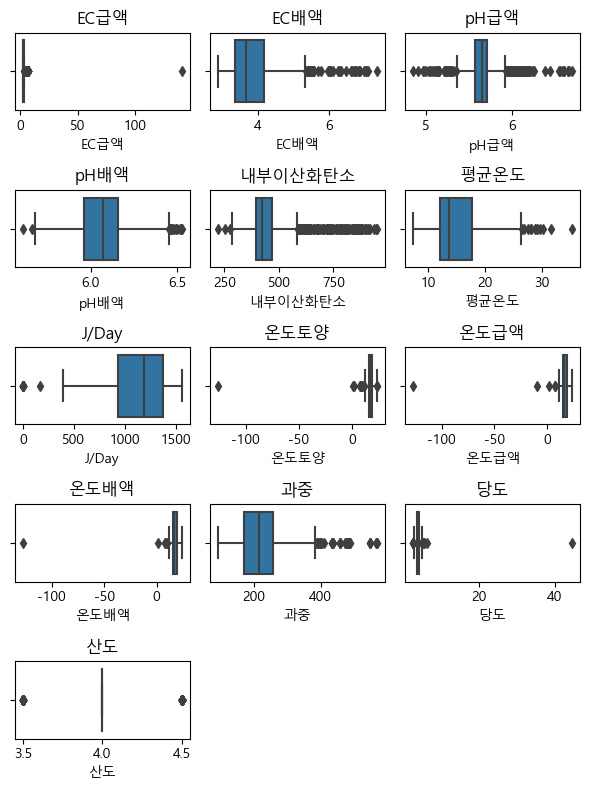

In [25]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_origin.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_origin[tom_origin.columns[i]])
    plt.title(tom_origin.columns[i])
plt.tight_layout()

In [26]:
print(tom_origin.isnull().sum())
print("----------------------------")
print(tom_origin.notnull().sum())

EC급액        188
EC배액        188
pH급액        188
pH배액        188
내부이산화탄소     188
평균온도        188
J/Day       819
온도토양        282
온도급액       1038
온도배액       1038
과중            0
당도            0
산도            0
dtype: int64
----------------------------
EC급액       1008
EC배액       1008
pH급액       1008
pH배액       1008
내부이산화탄소    1008
평균온도       1008
J/Day       377
온도토양        914
온도급액        158
온도배액        158
과중         1196
당도         1196
산도         1196
dtype: int64


### 환경데이터 셋
- 급액 ph : (5.0이하 / 6.5이상 = 토마토 x)
- 배액 PH : (4.5이하 / 7.0이상 / 식물 X)
- 급액 ec : 2.5 ~ 3.5 적정
- 배액 ec : 3.5 ~ 4.5 적정
- co2 : 397 ~ 586
- 평균온도 : (10도 이하 / 30도 넘어가는 환경이 없음)
- 누적일사량 : 600 ~ 1300

In [27]:
# 환경데이터 셋에 맞추어 이상치 값 확인

In [28]:
# 사전확인
print(len(tom_origin[(tom_origin["pH급액"] <= 6.5) & (tom_origin["pH급액"] >= 5.0)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["pH급액"] <= 5.0]))
print(len(tom_origin[tom_origin["pH급액"] >= 6.5]))

992
-----------------------------------------------------------------------------
5
11


In [29]:
# 사전확인
print(len(tom_origin[(tom_origin["pH배액"] <= 7.0) & (tom_origin["pH배액"] >= 4.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["pH배액"] <= 4.5]))
print(len(tom_origin[tom_origin["pH배액"] >= 7.0]))

1008
-----------------------------------------------------------------------------
0
0


In [30]:
print(len(tom_origin[(tom_origin["EC급액"] <= 3.5) & (tom_origin["EC급액"] >= 2.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["EC급액"] <= 2.5]))
print(len(tom_origin[tom_origin["EC급액"] >= 3.5]))

789
-----------------------------------------------------------------------------
127
92


In [31]:
print(len(tom_origin[(tom_origin["EC배액"] <= 4.5) & (tom_origin["EC배액"] >= 3.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["EC배액"] <= 3.5]))
print(len(tom_origin[tom_origin["EC배액"] >= 4.5]))

451
-----------------------------------------------------------------------------
376
183


In [32]:
print(len(tom_origin[(tom_origin["내부이산화탄소"] <= 586) & (tom_origin["내부이산화탄소"] >= 397)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["내부이산화탄소"] <= 397]))
print(len(tom_origin[tom_origin["내부이산화탄소"] >= 586]))

607
-----------------------------------------------------------------------------
283
119


In [33]:
print(len(tom_origin[(tom_origin["평균온도"] <= 20.3) & (tom_origin["평균온도"] >= 17.5)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["평균온도"] <= 17.5]))
print(len(tom_origin[tom_origin["평균온도"] >= 20.3]))

106
-----------------------------------------------------------------------------
739
163


In [34]:
print(len(tom_origin[(tom_origin["J/Day"] <= 1270) & (tom_origin["J/Day"] >= 600)]))
print("-----------------------------------------------------------------------------")
print(len(tom_origin[tom_origin["J/Day"] <= 600]))
print(len(tom_origin[tom_origin["J/Day"] >= 1300]))

184
-----------------------------------------------------------------------------
47
120


### * 참고
- tom1 GPS 정보:  35°36'0.95",  127°30'23.87" 코멘트: Jeollabuk-do Jangsu null Jangsu-eup 
- tom2 GPS 정보:  35°35'37.93",  127°30'28.94" 코멘트: Jeollabuk-do Jangsu null Jangsu-eup
- tom3 GPS 정보:  35°36'48.49",  127°26'43.47" 코멘트: Jeollabuk-do Jangsu null Jangsu-eup
- tom4 GPS 정보:  35°45'6.63",  129°11'5.14" 코멘트: Gyeongsangbuk-do Gyeongju null Naenam-myeon
- tom5 GPS 정보:  35°58'34.03",  129°16'27.04" 코멘트: Gyeongsangbuk-do Gyeongju null Gangdong-myeon
- tom6 GPS 정보:  35°4'4.13",  127°55'37.10" 코멘트: Gyeongsangnam-do Sacheon null Gonyang-myeon

#### 이상치 확인결과
- BOXPLOT과 환경데이터 셋의 공통컬럼 비교해 봤을 때, PH급액/PH배액/EC급액/EC배액/CO2 컬럼에 대해 상한 이상치 이상 데이터 삭제조치
- J/Day, 온도토양, 온도급액, 온도배액 : 특이점 이상치만 제거(차이가 많이 나는)
- 과중, 당도, 산도 : 특이점 이상치 행 제거

In [35]:
# # 1) EC급액, EC배액, CO2, PH급액, ph배액
# tom_origin.loc[tom_origin["EC급액"] >= 3.5, "EC급액"] = None
# tom_origin.loc[tom_origin["EC배액"] >= 4.5, "EC배액"] = None
# tom_origin.loc[(tom_origin["내부이산화탄소"] >= 586) | (tom_origin["내부이산화탄소"] <= 397), "내부이산화탄소"] = None
# tom_origin.loc[(tom_origin["pH급액"] >= 6.5) | (tom_origin["pH급액"] <= 5.0), "pH급액"] = None

In [36]:
# # 2) J/Day, 온도토양, 온도급액, 온도배액

# # J/Day : "0"값 15개 null값으로 변경
# # tom_origin["J/Day"].value_counts().sort_index()
# tom_origin.loc[tom_origin["J/Day"] < 600, "J/Day"] = None

# # 온도토양 : "10도 이하" null값으로 변경
# # tom_origin["온도토양"].value_counts().sort_index()
# tom_origin.loc[tom_origin["온도토양"] <= 10, "온도토양"] = None

# # 평균온도 : "10도이하, 30도 이상" null값으로 변경
# tom_origin.loc[(tom_origin["평균온도"] <= 10) | (tom_origin["평균온도"] >= 30), "평균온도"] = None

# # 온도급액 : "10도이하"  null값으로 변경
# # tom_origin["온도급액"].value_counts().sort_index()
# tom_origin.loc[tom_origin["온도급액"] <= 10, "온도급액"] = None

# # 온도배액 : "10도이하"  null값으로 변경
# # tom_origin["온도배액"].value_counts().sort_index()
# tom_origin.loc[tom_origin["온도배액"] <= 10 , "온도배액"] = None

In [37]:
# # 3) 과중, 당도, 산도 

# # 과중 : 변동없음 유지
# # tom_origin["과중"].value_counts().sort_index(ascending = False)

# # 당도 : "44.5" -> "4.5" 변경 / 콜라 당도 11임을 고려 존재 할 수 없는 토마토
# # tom_origin["당도"].value_counts().sort_index(ascending = False)
# tom_origin.loc[tom_origin["당도"] == tom_origin["당도"].max(), "당도"] = 4.5

# # 산도 : 변동없음 유지
# # tom_origin["산도"].value_counts().sort_index(ascending = False)

### 환경데이터 셋 two
- J/Day : 600 ~ 1300
- 평균온도 :  17.4 ~    15 ~ 30도로 유지해야함
- EC 급액 : 2.5 ~ 3.5
- EC 배액 : 3.5 ~ 5.0
- pH 급액 : 5.2 ~ 5.9 or  ## 6.0 ~ 6.5 가 적절하다고 여김 
- pH 배액 : 5.0 ~ 7.0
- 이산화탄소농도 : 400 ~ 600
- 온도토양 : 15 ~ 25
- 온도급액 : 15 ~ 30
- 온도배액 : 15 ~ 30

In [38]:
# 1) EC급액, EC배액, CO2, PH급액, ph배액
tom_origin.loc[tom_origin["EC급액"] >= 3.5, "EC급액"] = None
tom_origin.loc[tom_origin["EC배액"] >= 5.0, "EC배액"] = None
tom_origin.loc[(tom_origin["내부이산화탄소"] >= 600) | (tom_origin["내부이산화탄소"] <= 400), "내부이산화탄소"] = None
tom_origin.loc[(tom_origin["pH급액"] >= 6.5) | (tom_origin["pH급액"] <= 5.0), "pH급액"] = None
tom_origin.loc[(tom_origin["pH배액"] >= 7) | (tom_origin["pH급액"] <= 5.0), "pH급액"] = None

In [39]:
# 2) J/Day, 온도토양, 온도급액, 온도배액

# J/Day : "0"값 15개 null값으로 변경
# tom_origin["J/Day"].value_counts().sort_index()
tom_origin.loc[tom_origin["J/Day"] < 600, "J/Day"] = None

# 온도토양 : "10도 이하" null값으로 변경
# tom_origin["온도토양"].value_counts().sort_index()
tom_origin.loc[(tom_origin["온도토양"] <= 15) | (tom_origin["온도토양"] >= 30), "온도토양"] = None

# 평균온도 : "10도이하, 30도 이상" null값으로 변경
tom_origin.loc[(tom_origin["평균온도"] <= 15) | (tom_origin["평균온도"] >= 30), "평균온도"] = None

# 온도급액 : "10도이하"  null값으로 변경
# tom_origin["온도급액"].value_counts().sort_index()
tom_origin.loc[(tom_origin["온도급액"] <= 15) | (tom_origin["온도급액"] >= 30), "온도급액"] = None

# 온도배액 : "10도이하"  null값으로 변경
# tom_origin["온도배액"].value_counts().sort_index()
tom_origin.loc[(tom_origin["온도배액"] <= 15) | (tom_origin["온도배액"] >= 30) , "온도배액"] = None

In [40]:
# 3) 과중, 당도, 산도 

# 과중 : 변동없음 유지
# tom_origin["과중"].value_counts().sort_index(ascending = False)

# 당도 : "44.5" -> "4.5" 변경 / 콜라 당도 11임을 고려 존재 할 수 없는 토마토
# tom_origin["당도"].value_counts().sort_index(ascending = False)
tom_origin.loc[tom_origin["당도"] == tom_origin["당도"].max(), "당도"] = 4.5

# 산도 : 변동없음 유지
# tom_origin["산도"].value_counts().sort_index(ascending = False)

In [41]:
tom_origin

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
1,NaN,NaN,5.604356,5.761377,425.869110,25.610524,1255.0,NaN,NaN,NaN,205,4.1,4
2,NaN,NaN,5.724704,5.930016,473.792000,17.171600,874.0,NaN,NaN,NaN,210,4.7,4
3,NaN,NaN,NaN,NaN,NaN,NaN,1424.0,NaN,NaN,NaN,205,4.7,4
4,NaN,NaN,NaN,NaN,NaN,NaN,1539.6,NaN,NaN,NaN,206,4.7,4.5
5,NaN,NaN,5.796851,5.961253,431.304124,17.109330,NaN,NaN,NaN,NaN,223,4.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2.444833,3.705833,5.606667,6.172000,NaN,NaN,NaN,20.227000,NaN,NaN,148,4.5,4
93,2.412500,3.646833,5.630167,6.194500,NaN,NaN,NaN,19.312000,NaN,NaN,142,4.6,4
94,2.400000,3.621500,5.631667,6.206333,NaN,NaN,NaN,18.660667,NaN,NaN,151,4.5,3.5
95,2.392500,3.611667,5.647167,6.193000,NaN,NaN,NaN,18.066833,NaN,NaN,145,4.3,3.5


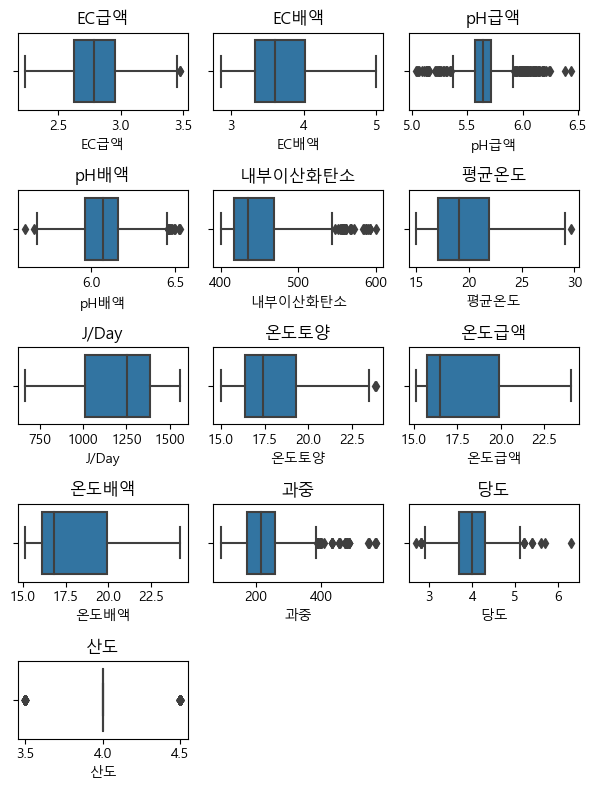

In [42]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_origin.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_origin[tom_origin.columns[i]])
    plt.title(tom_origin.columns[i])
plt.tight_layout()

### 원본데이터 checkpoint

In [43]:
tom_origin.to_csv("tomato_farm_set/tom_origin.csv", encoding = "utf-8")

In [44]:
# R분석을 위한 결측치 0값 채우기
tom_origin_zero = tom_origin.fillna(0)
tom_origin_zero.to_csv("tomato_farm_set/tom_origin_zero.csv", encoding = "utf-8")

### 정규화 해볼까?

In [45]:
X = tom_origin[tom_origin.columns[:-3]]
y = tom_origin[tom_origin.columns[-3:]]
scaler = StandardScaler()
tom_ori_X_scaler = scaler.fit_transform(X)
tom_ori_X_scaler = pd.DataFrame(tom_ori_X_scaler, columns = tom_origin.columns[:-3])

In [46]:
tom_ori_X_scaler

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액
0,NaN,NaN,-0.315240,-2.013207,-0.540394,1.882877,0.246078,NaN,NaN,NaN
1,NaN,NaN,0.371638,-0.915795,0.570723,-0.778777,-1.455619,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.000899,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1.517214,NaN,NaN,NaN
4,NaN,NaN,0.783409,-0.712524,-0.414381,-0.798417,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1191,-1.375529,0.019053,-0.302052,0.658907,NaN,NaN,NaN,1.330490,NaN,NaN
1192,-1.501294,-0.097950,-0.167928,0.805325,NaN,NaN,NaN,0.822165,NaN,NaN
1193,-1.549915,-0.148188,-0.159367,0.882330,NaN,NaN,NaN,0.460319,NaN,NaN
1194,-1.579087,-0.167689,-0.070901,0.795564,NaN,NaN,NaN,0.130417,NaN,NaN


In [47]:
y = y.reset_index()
del y["index"]

### 원본데이터 scale Checkpoint

In [48]:
tom_ori_scaler = pd.concat([tom_ori_X_scaler, y], axis = 1)
tom_ori_scaler

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,NaN,NaN,-0.315240,-2.013207,-0.540394,1.882877,0.246078,NaN,NaN,NaN,205,4.1,4
1,NaN,NaN,0.371638,-0.915795,0.570723,-0.778777,-1.455619,NaN,NaN,NaN,210,4.7,4
2,NaN,NaN,NaN,NaN,NaN,NaN,1.000899,NaN,NaN,NaN,205,4.7,4
3,NaN,NaN,NaN,NaN,NaN,NaN,1.517214,NaN,NaN,NaN,206,4.7,4.5
4,NaN,NaN,0.783409,-0.712524,-0.414381,-0.798417,NaN,NaN,NaN,NaN,223,4.3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,-1.375529,0.019053,-0.302052,0.658907,NaN,NaN,NaN,1.330490,NaN,NaN,148,4.5,4
1192,-1.501294,-0.097950,-0.167928,0.805325,NaN,NaN,NaN,0.822165,NaN,NaN,142,4.6,4
1193,-1.549915,-0.148188,-0.159367,0.882330,NaN,NaN,NaN,0.460319,NaN,NaN,151,4.5,3.5
1194,-1.579087,-0.167689,-0.070901,0.795564,NaN,NaN,NaN,0.130417,NaN,NaN,145,4.3,3.5


In [49]:
tom_ori_scaler.to_csv("tomato_farm_set/tom_ori_scaler.csv", encoding = "utf-8")

## 2) Simple imputer

In [50]:
# mean
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
tom_mean = imputer.fit_transform(tom_origin)
tom_mean = pd.DataFrame(tom_mean, columns = tom_origin.columns)
tom_mean

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,2.798473,3.696225,5.604356,5.761377,425.869110,25.610524,1255.000000,17.832078,17.785468,17.899151,205.0,4.1,4.0
1,2.798473,3.696225,5.724704,5.930016,473.792000,17.171600,874.000000,17.832078,17.785468,17.899151,210.0,4.7,4.0
2,2.798473,3.696225,5.659589,6.070746,449.176518,19.640756,1424.000000,17.832078,17.785468,17.899151,205.0,4.7,4.0
3,2.798473,3.696225,5.659589,6.070746,449.176518,19.640756,1539.600000,17.832078,17.785468,17.899151,206.0,4.7,4.5
4,2.798473,3.696225,5.796851,5.961253,431.304124,17.109330,1199.904646,17.832078,17.785468,17.899151,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.444833,3.705833,5.606667,6.172000,449.176518,19.640756,1199.904646,20.227000,17.785468,17.899151,148.0,4.5,4.0
1192,2.412500,3.646833,5.630167,6.194500,449.176518,19.640756,1199.904646,19.312000,17.785468,17.899151,142.0,4.6,4.0
1193,2.400000,3.621500,5.631667,6.206333,449.176518,19.640756,1199.904646,18.660667,17.785468,17.899151,151.0,4.5,3.5
1194,2.392500,3.611667,5.647167,6.193000,449.176518,19.640756,1199.904646,18.066833,17.785468,17.899151,145.0,4.3,3.5


#### 파생컬럼 추가(EC비율, pH비율)

In [51]:
# EC공급과 배액의 차이가 과실성장에 영향을 미침을 확인 
# 동시에 PH비율도 확인해보자
tom_mean["EC비율"] = (tom_mean["EC배액"] / tom_mean["EC급액"])
tom_mean["pH비율"] = (tom_mean["pH배액"] / tom_mean["pH급액"])
tom_mean = tom_mean[['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom_mean.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.798473,3.696225,5.604356,5.761377,425.869110,25.610524,1255.000000,17.832078,17.785468,17.899151,1.320801,1.028018,205.0,4.1,4.0
1,2.798473,3.696225,5.724704,5.930016,473.792000,17.171600,874.000000,17.832078,17.785468,17.899151,1.320801,1.035864,210.0,4.7,4.0
2,2.798473,3.696225,5.659589,6.070746,449.176518,19.640756,1424.000000,17.832078,17.785468,17.899151,1.320801,1.072648,205.0,4.7,4.0
3,2.798473,3.696225,5.659589,6.070746,449.176518,19.640756,1539.600000,17.832078,17.785468,17.899151,1.320801,1.072648,206.0,4.7,4.5
4,2.798473,3.696225,5.796851,5.961253,431.304124,17.109330,1199.904646,17.832078,17.785468,17.899151,1.320801,1.028361,223.0,4.3,4.0


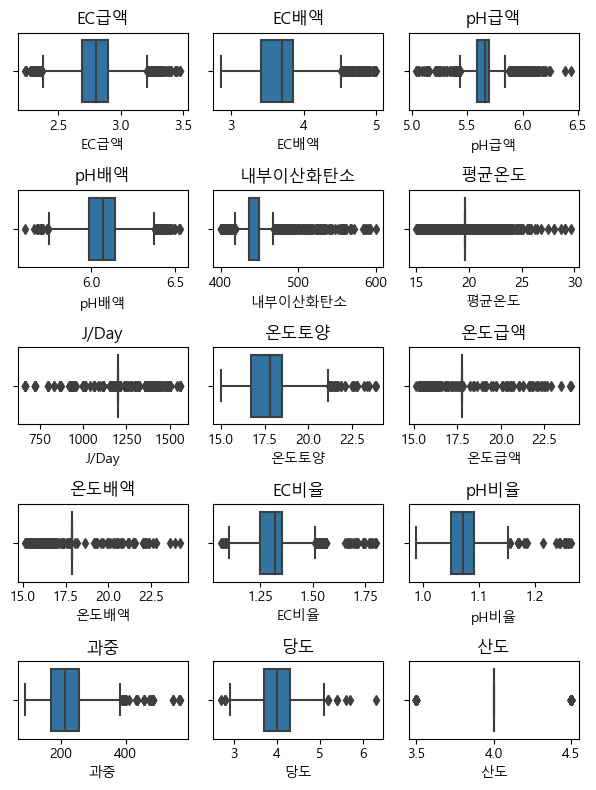

In [52]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_mean.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_mean[tom_mean.columns[i]])
    plt.title(tom_mean.columns[i])
plt.tight_layout()

In [53]:
# median
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
tom_median = imputer.fit_transform(tom_origin)
tom_median = pd.DataFrame(tom_median, columns = tom_origin.columns)
tom_median

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,2.785833,3.611583,5.604356,5.761377,425.869110,25.610524,1255.0,17.390833,16.487399,16.842,205.0,4.1,4.0
1,2.785833,3.611583,5.724704,5.930016,473.792000,17.171600,874.0,17.390833,16.487399,16.842,210.0,4.7,4.0
2,2.785833,3.611583,5.646417,6.071750,435.725000,19.046740,1424.0,17.390833,16.487399,16.842,205.0,4.7,4.0
3,2.785833,3.611583,5.646417,6.071750,435.725000,19.046740,1539.6,17.390833,16.487399,16.842,206.0,4.7,4.5
4,2.785833,3.611583,5.796851,5.961253,431.304124,17.109330,1254.0,17.390833,16.487399,16.842,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.444833,3.705833,5.606667,6.172000,435.725000,19.046740,1254.0,20.227000,16.487399,16.842,148.0,4.5,4.0
1192,2.412500,3.646833,5.630167,6.194500,435.725000,19.046740,1254.0,19.312000,16.487399,16.842,142.0,4.6,4.0
1193,2.400000,3.621500,5.631667,6.206333,435.725000,19.046740,1254.0,18.660667,16.487399,16.842,151.0,4.5,3.5
1194,2.392500,3.611667,5.647167,6.193000,435.725000,19.046740,1254.0,18.066833,16.487399,16.842,145.0,4.3,3.5


#### 파생컬럼 추가(EC비율, pH비율)

In [54]:
tom_median["EC비율"] = (tom_median["EC배액"] / tom_median["EC급액"])
tom_median["pH비율"] = (tom_median["pH배액"] / tom_median["pH급액"])
tom_median = tom_median[['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom_median.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.785833,3.611583,5.604356,5.761377,425.869110,25.610524,1255.0,17.390833,16.487399,16.842,1.29641,1.028018,205.0,4.1,4.0
1,2.785833,3.611583,5.724704,5.930016,473.792000,17.171600,874.0,17.390833,16.487399,16.842,1.29641,1.035864,210.0,4.7,4.0
2,2.785833,3.611583,5.646417,6.071750,435.725000,19.046740,1424.0,17.390833,16.487399,16.842,1.29641,1.075328,205.0,4.7,4.0
3,2.785833,3.611583,5.646417,6.071750,435.725000,19.046740,1539.6,17.390833,16.487399,16.842,1.29641,1.075328,206.0,4.7,4.5
4,2.785833,3.611583,5.796851,5.961253,431.304124,17.109330,1254.0,17.390833,16.487399,16.842,1.29641,1.028361,223.0,4.3,4.0


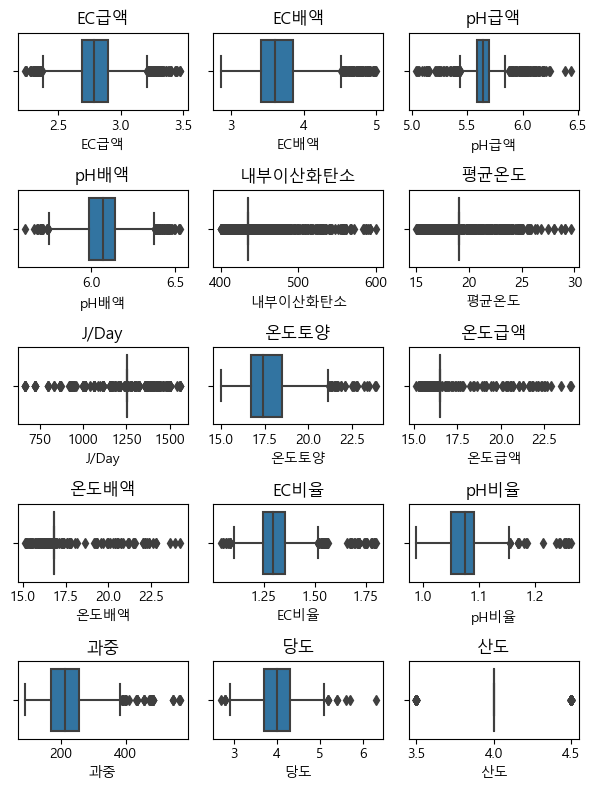

In [55]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_median.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_median[tom_median.columns[i]])
    plt.title(tom_median.columns[i])
plt.tight_layout()

## 3) KNN imputer

In [56]:
from sklearn.impute import KNNImputer
tom_knn = []
for i in range(3, 10, 2):
    imputer_i = KNNImputer(n_neighbors=i)
    print("n_neighbors :", i)
    tom_knn.append(imputer_i.fit_transform(tom_origin))

n_neighbors : 3
n_neighbors : 5
n_neighbors : 7
n_neighbors : 9


In [57]:
# numpy를 DataFrame으로 변환 / 컬럼 재설정
tom_knn_list = []
for i in range(len(tom_knn)):
    cvt_tom = pd.DataFrame(tom_knn[i])
    cvt_tom.columns = ['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', '과중', '당도', '산도']
    tom_knn_list.append(cvt_tom)

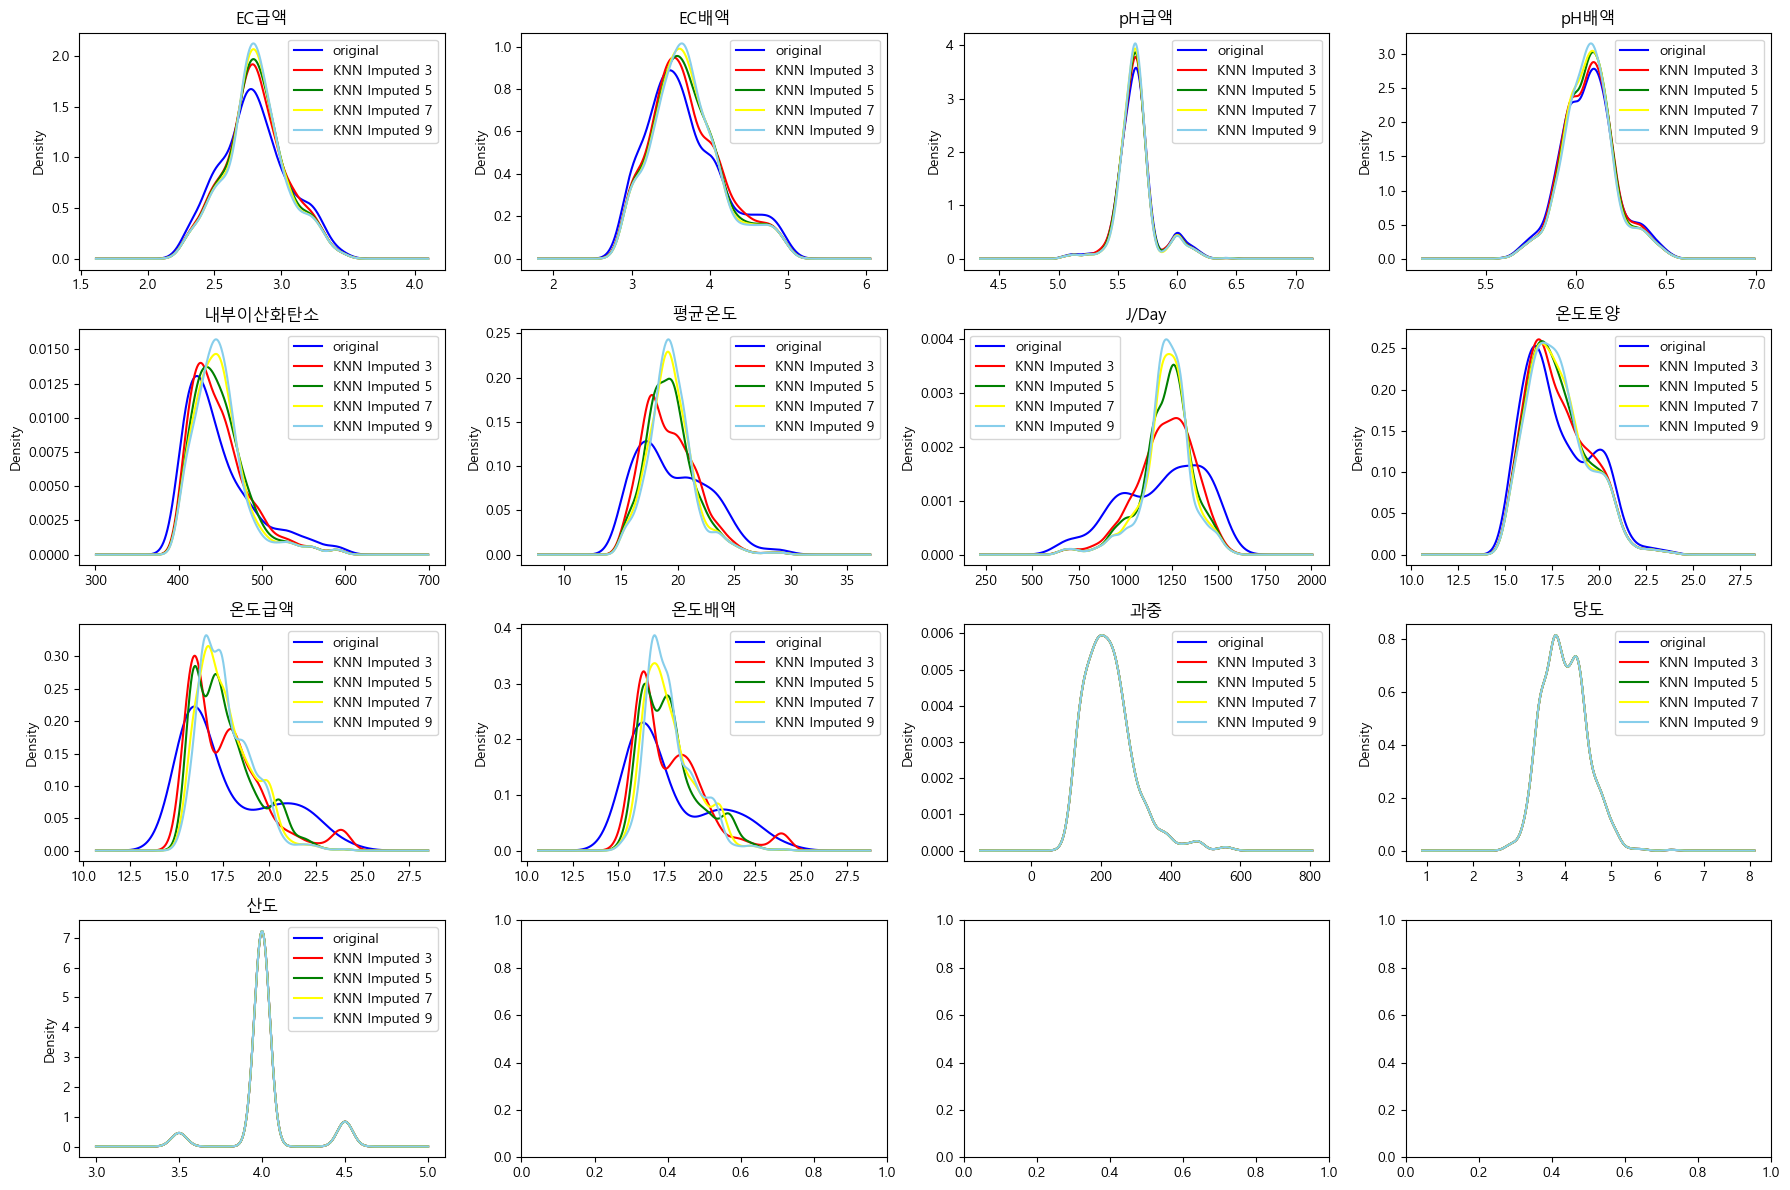

In [58]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2, column3, column4, column5) in enumerate(zip(tom_origin.columns, tom_knn_list[0].columns,
                                          tom_knn_list[1].columns, tom_knn_list[2].columns,
                                          tom_knn_list[3].columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_knn_list[0][column2].plot(kind = "kde", ax = ax, color = "red", label = "KNN Imputed 3")
    tom_knn_list[1][column3].plot(kind = "kde", ax = ax, color = "green", label = "KNN Imputed 5")
    tom_knn_list[2][column4].plot(kind = "kde", ax = ax, color = "yellow", label = "KNN Imputed 7")
    tom_knn_list[3][column5].plot(kind = "kde", ax = ax, color = "skyblue", label = "KNN Imputed 9")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

#### 파생컬럼 추가(EC비율, pH비율)

In [59]:
tom_knn_list[3]["EC비율"] = (tom_knn_list[3]["EC배액"] / tom_knn_list[3]["EC급액"])
tom_knn_list[3]["pH비율"] = (tom_knn_list[3]["pH배액"] / tom_knn_list[3]["pH급액"])
tom_knn_list[3] = tom_knn_list[3][['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom_knn_list[3].head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.817660,3.558440,5.604356,5.761377,425.869110,25.610524,1255.000000,17.042476,18.550597,19.063580,1.262906,1.028018,205.0,4.1,4.0
1,2.818444,3.600019,5.724704,5.930016,473.792000,17.171600,874.000000,17.723148,17.999278,18.550109,1.277307,1.035864,210.0,4.7,4.0
2,2.753455,3.576254,5.579714,6.117280,443.579782,20.142528,1424.000000,17.174437,18.390647,19.005919,1.298824,1.096343,205.0,4.7,4.0
3,2.777595,3.658797,5.721449,6.141280,443.155708,19.803045,1539.600000,17.056612,18.390647,19.005919,1.317254,1.073378,206.0,4.7,4.5
4,2.818562,3.792080,5.796851,5.961253,431.304124,17.109330,1175.222222,18.831188,16.430748,16.777224,1.345395,1.028361,223.0,4.3,4.0


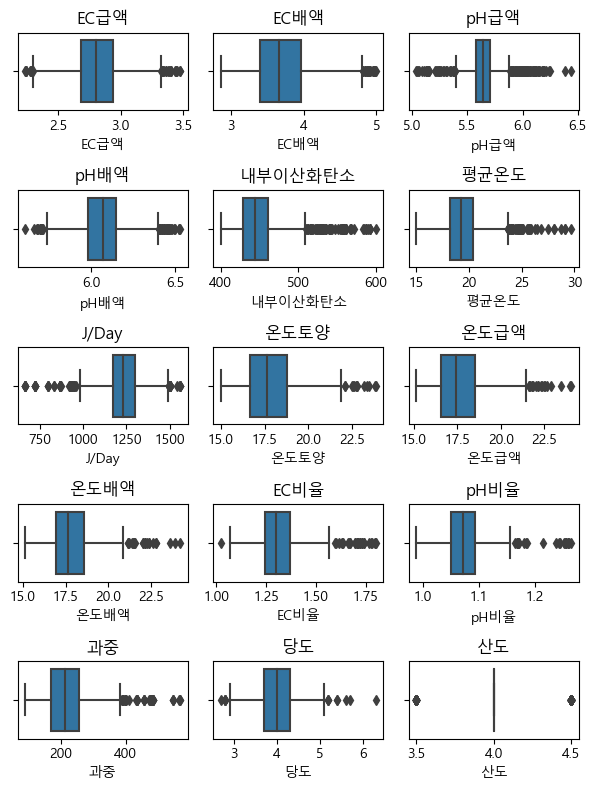

In [60]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_knn_list[3].columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_knn_list[3][tom_knn_list[3].columns[i]])
    plt.title(tom_knn_list[3].columns[i])
plt.tight_layout()

### KNN imputer Checkpoint

In [61]:
# neighbor 9 모델 저장
tom_knn_list[3].to_csv("tomato_farm_set/tom_knn.csv", encoding = "utf-8")

### KNN imputer scale Checkpoint

In [62]:
X = tom_knn_list[3][tom_knn_list[3].columns[:-3]]
y = tom_knn_list[3][tom_knn_list[3].columns[-3:]]
scaler = StandardScaler()
tom_knn_X_scaler = scaler.fit_transform(X)
tom_knn_X_scaler = pd.DataFrame(tom_knn_X_scaler, columns = tom_knn_list[3].columns[:-3])

In [63]:
tom_knn_scale = pd.concat([tom_knn_X_scaler, y], axis = 1)

In [64]:
tom_knn_scale.to_csv("tomato_farm_set/tom_knn_scale.csv", encoding = "utf-8")

## 4) Multivariate feature imputation

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10000, random_state = 0)
tom_mul = imputer.fit_transform(tom_origin)
tom_mul

array([[  2.94720128,   3.53712472,   5.60435602, ..., 205.        ,
          4.1       ,   4.        ],
       [  2.46584042,   3.41500625,   5.724704  , ..., 210.        ,
          4.7       ,   4.        ],
       [  2.89679837,   3.64233967,   5.63437618, ..., 205.        ,
          4.7       ,   4.        ],
       ...,
       [  2.4       ,   3.6215    ,   5.63166667, ..., 151.        ,
          4.5       ,   3.5       ],
       [  2.3925    ,   3.61166667,   5.64716667, ..., 145.        ,
          4.3       ,   3.5       ],
       [  2.38      ,   3.59766667,   5.65916667, ..., 220.        ,
          4.4       ,   4.        ]])

In [66]:
# numpy를 DataFrame으로 변환 / 컬럼 재설정
tom_mul = pd.DataFrame(tom_mul)
tom_mul.columns = ['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
   '온도급액', '온도배액', '과중', '당도', '산도']
tom_mul.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,과중,당도,산도
0,2.947201,3.537125,5.604356,5.761377,425.869110,25.610524,1255.000000,20.145662,22.882991,23.121157,205.0,4.1,4.0
1,2.465840,3.415006,5.724704,5.930016,473.792000,17.171600,874.000000,16.245610,17.780433,17.687470,210.0,4.7,4.0
2,2.896798,3.642340,5.634376,6.030876,423.203887,19.676066,1424.000000,17.902823,19.569702,19.568462,205.0,4.7,4.0
3,2.966108,3.635233,5.629648,6.020911,406.102335,19.603463,1539.600000,17.911659,19.600137,19.602344,206.0,4.7,4.5
4,2.618162,3.364780,5.796851,5.961253,431.304124,17.109330,1570.246764,15.412287,17.062263,17.148960,223.0,4.3,4.0


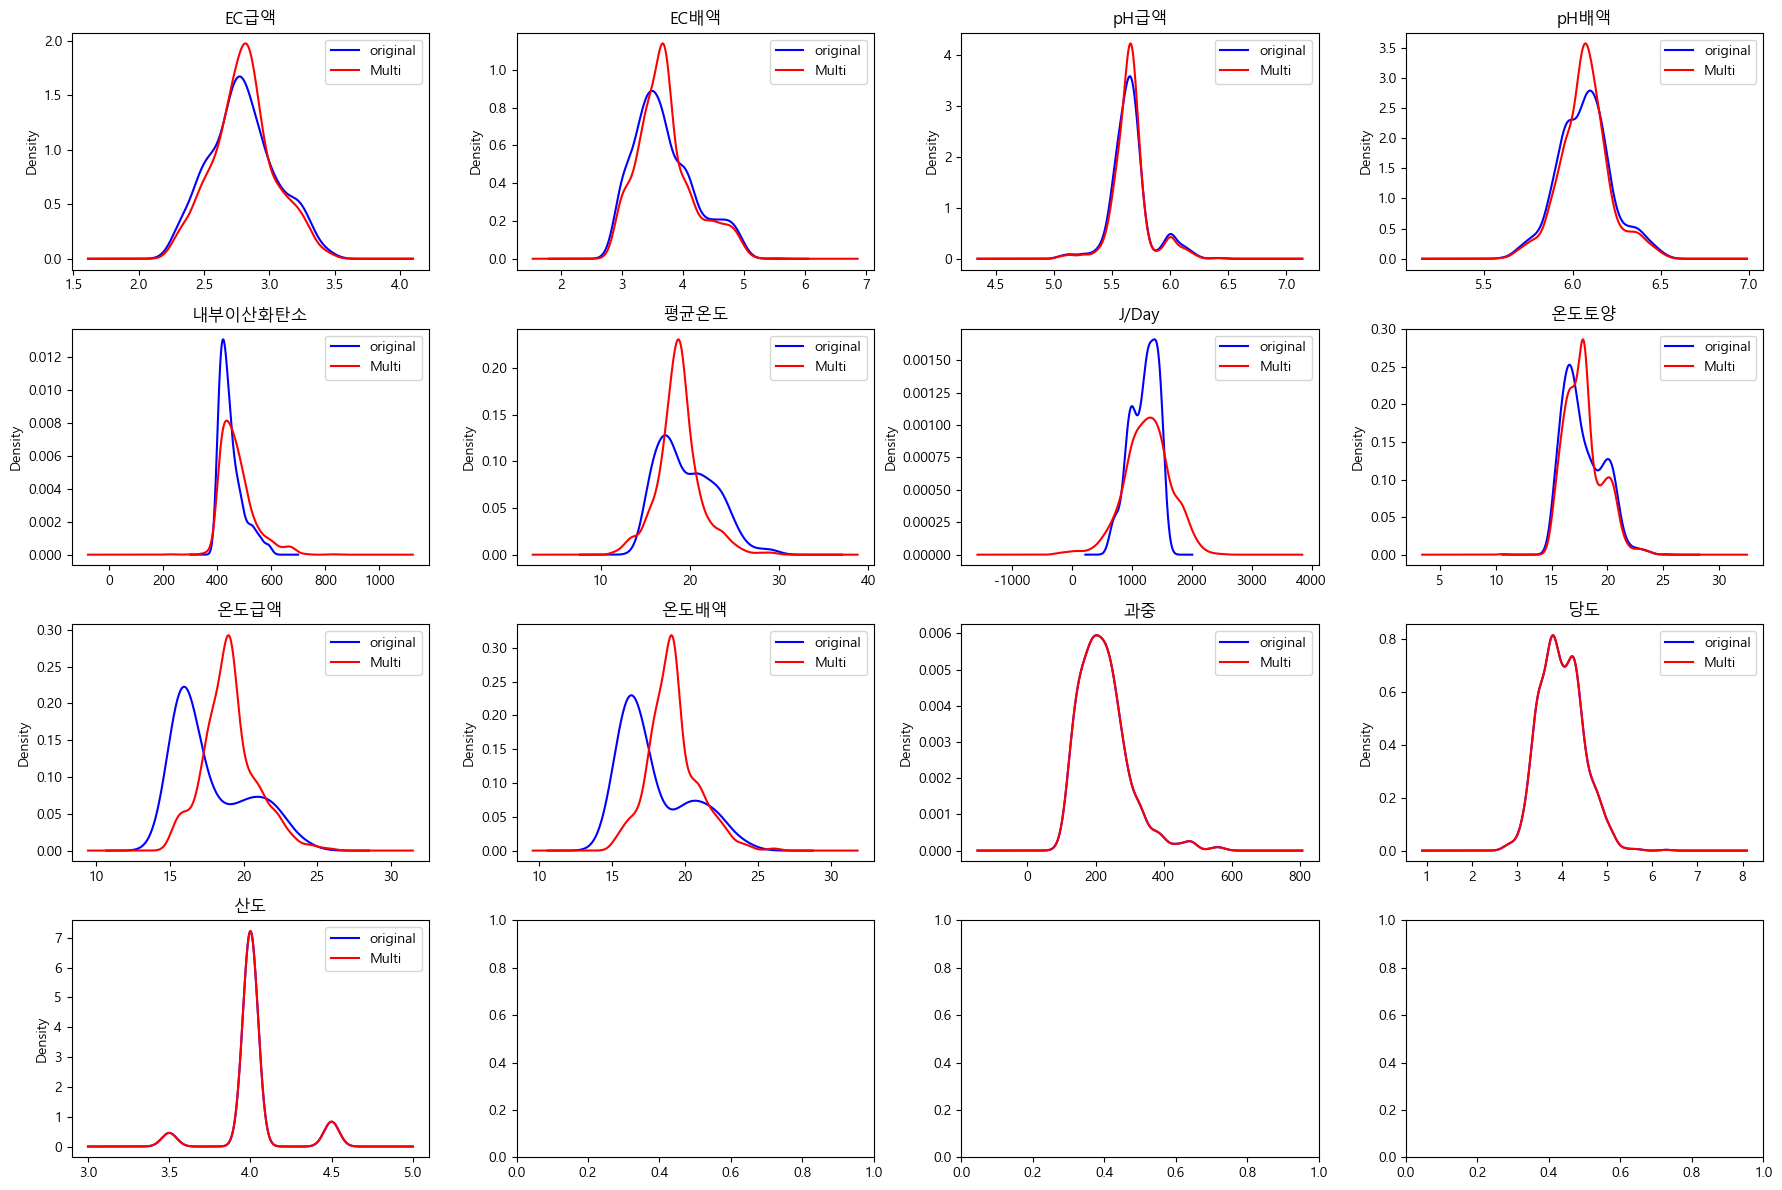

In [67]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom_mul.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom_mul[column2].plot(kind = "kde", ax = ax, color = "red", label = "Multi")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

#### 파생컬럼 추가(EC비율, pH비율)

In [68]:
tom_mul["EC비율"] = (tom_mul["EC배액"] / tom_mul["EC급액"])
tom_mul["pH비율"] = (tom_mul["pH배액"] / tom_mul["pH급액"])
tom_mul = tom_mul[['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom_mul.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.947201,3.537125,5.604356,5.761377,425.869110,25.610524,1255.000000,20.145662,22.882991,23.121157,1.200164,1.028018,205.0,4.1,4.0
1,2.465840,3.415006,5.724704,5.930016,473.792000,17.171600,874.000000,16.245610,17.780433,17.687470,1.384926,1.035864,210.0,4.7,4.0
2,2.896798,3.642340,5.634376,6.030876,423.203887,19.676066,1424.000000,17.902823,19.569702,19.568462,1.257367,1.070372,205.0,4.7,4.0
3,2.966108,3.635233,5.629648,6.020911,406.102335,19.603463,1539.600000,17.911659,19.600137,19.602344,1.225590,1.069501,206.0,4.7,4.5
4,2.618162,3.364780,5.796851,5.961253,431.304124,17.109330,1570.246764,15.412287,17.062263,17.148960,1.285169,1.028361,223.0,4.3,4.0


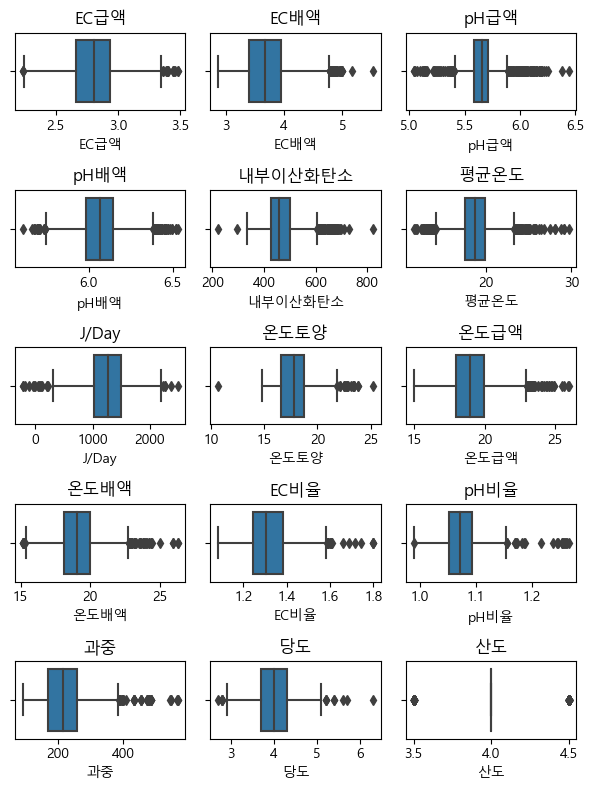

In [69]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom_mul.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom_mul[tom_mul.columns[i]])
    plt.title(tom_mul.columns[i])
plt.tight_layout()

### Multi imputer Checkpoint

In [70]:
tom_mul.to_csv("tomato_farm_set/tom_mul.csv", encoding = "utf-8")

### Multi imputer scale Checkpoint

In [71]:
X = tom_mul[tom_mul.columns[:-3]]
y = tom_mul[tom_mul.columns[-3:]]
scaler = StandardScaler()
tom_mul_X_scaler = scaler.fit_transform(X)
tom_mul_X_scaler = pd.DataFrame(tom_mul_X_scaler, columns = tom_mul.columns[:-3])

In [72]:
tom_mul_scale = pd.concat([tom_mul_X_scaler, y], axis = 1)

In [73]:
tom_mul_scale.to_csv("tomato_farm_set/tom_mul_scale.csv", encoding = "utf-8")

## *데이터 재정립 
- 1번 j.day => 5번 j.day 채우기

In [74]:
farm1_unit = farm1[["날짜", "J/Day"]]
print(farm1_unit["날짜"].min(), "/", farm1_unit["날짜"].max())

2021-10-21 10:00:00 / 2021-11-28 05:00:00


In [75]:
print(farm5["날짜"].min(), "/", farm5["날짜"].max())

2021-11-10 12:00:00 / 2021-12-21 12:00:00


In [76]:
farm5_1 = farm5
del farm5_1["J/Day"]

In [77]:
pd.merge(farm1_unit, farm5_1, how = "inner") 

,날짜,J/Day,평균온도,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,온도토양,온도급액,온도배액
0,2021-11-12 09:00:00,493.0,19.76,2.833915,5.083508,6.355830,5.863970,395.711111,14.403704,15.622685,15.298148
1,2021-11-12 10:00:00,493.0,22.49,2.957932,5.326913,6.076204,5.830677,335.569892,16.894489,17.831317,17.304435
2,2021-11-26 11:00:00,938.0,24.45,2.947751,4.186575,6.088612,6.234728,336.020408,15.014031,19.941327,19.682398
3,2021-11-26 12:00:00,938.0,28.09,3.070100,4.280876,6.078106,6.225169,297.725352,17.023768,22.205106,22.097271
4,2021-11-26 13:00:00,938.0,30.12,3.193433,4.354820,6.030326,6.209128,294.056738,19.374557,24.139628,24.050532
5,2021-11-26 14:00:00,938.0,28.80,3.233286,4.369753,6.043340,6.211624,288.382979,21.027482,24.500443,24.493351
6,2021-11-26 15:00:00,938.0,25.07,3.174275,4.317193,6.145977,6.232771,295.404580,21.906011,23.481393,23.826336
7,2021-11-26 16:00:00,938.0,20.23,3.003985,4.130806,6.278554,6.273719,312.410072,21.912770,20.975270,21.389838
8,2021-11-26 17:00:00,938.0,16.38,2.794959,3.858217,6.346084,6.297611,338.755725,21.066794,17.336355,17.924141
9,2021-11-26 18:00:00,938.0,13.51,2.623248,3.605762,6.374299,6.331293,360.653061,19.569303,14.225340,14.749150


In [78]:
farm1_c = farm1[farm1["J/Day"] != 0]
farm1_c[farm1_c['날짜'] > "2021-11-10"] # 1번 농장 0이 아닌 데이터 중에서 5번 농장 시작기간(11월 10일)에 맞게 119개 추출(5번 데이터 갯수)

,날짜,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day
136,2021-11-12 09:00:00,2.657813,4.502809,5.231713,5.901490,558.197452,19.132611,493.0
137,2021-11-12 10:00:00,5.086283,5.885853,5.507815,5.877543,657.323699,19.302370,493.0
138,2021-11-12 11:00:00,6.552251,6.045556,5.684585,5.891277,567.537234,16.932287,493.0
139,2021-11-12 12:00:00,6.997490,6.850585,5.732779,5.905137,628.121053,18.581105,493.0
140,2021-11-12 13:00:00,7.027407,6.914467,5.734755,5.909568,599.968750,17.476562,493.0
...,...,...,...,...,...,...,...,...
456,2021-11-28 01:00:00,4.650375,4.741851,5.651925,5.776258,526.306452,18.079409,1173.0
457,2021-11-28 02:00:00,4.641410,4.732820,5.652870,5.775793,533.027174,18.114946,1173.0
458,2021-11-28 03:00:00,4.637748,4.730881,5.652804,5.774788,540.508380,18.091229,1173.0
459,2021-11-28 04:00:00,4.633536,4.722147,5.654611,5.773257,549.405714,18.058000,1173.0


In [79]:
farm1_out = farm1_c[farm1_c['날짜'] > "2021-11-10"].iloc[0:119, :]
farm1_out["J/Day"].values
farm5_c = farm5

In [80]:
farm5_c["J/Day"] = farm1_out["J/Day"].values

## 5) 5번 농장 뿔리기?
- 각 컬럼마다 가지는 mean, std를 따르는 정규분포 난수 대입

In [81]:
dst1 = pd.concat(dst_tom_21, axis = 0)
dst2 = pd.concat(dst_tom_22, axis = 0)
dst_df = pd.concat([dst1, dst2], axis = 0)

In [82]:
farm5_c["날짜"] = pd.to_datetime(farm5_c["날짜"])

In [83]:
# farm5_c에 "주차" 컬럼 추가
week_list = []
for i in farm5_c["날짜"]:
    b = pd.to_datetime("2021-01-01")
    weeks = math.trunc((i - b).days / 7)
    if weeks <= 52:
        week_list.append(str(weeks).zfill(2))
    elif weeks > 52:
        week_list.append(str(weeks - 52).zfill(2))

In [84]:
farm5_c["주차"] = week_list

In [85]:
dst_df.index = np.arange(len(dst_df))
dst_df = dst_df.reset_index()

In [86]:
farm5_c = farm5_c.reset_index()

In [87]:
tom5_df = pd.concat([farm5_c, dst_df], axis = 1)
del tom5_df["index"]

In [88]:
del tom5_df["날짜"]

In [89]:
tom5_df.describe()
#          J/Day	 평균온도	 EC급액	   EC배액	        pH급액	pH배액	 내부이산화탄소	온도토양	온도급액	온도배액
# mean	921.829249	17.189244	2.745358	4.183593	6.383289	6.191583	391.681817	15.879518	15.599672	15.744600
# std	342.949775	5.395624	0.256896	0.692894	0.236881	0.305221	93.605860	3.260943	4.119580	4.061744
tom5_df.isnull().sum() # 1277개 값 정규분포 난수 넣기

평균온도       1277
EC급액       1277
EC배액       1277
pH급액       1277
pH배액       1277
내부이산화탄소    1277
온도토양       1277
온도급액       1277
온도배액       1277
J/Day      1277
주차         1277
주차            0
과중            0
당도            0
산도            0
dtype: int64

In [90]:
tom5_df.columns[:-5]

Index(['평균온도', 'EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '온도토양', '온도급액',
       '온도배액', 'J/Day'],
      dtype='object')

In [91]:
# 정규분포 난수 넣기
# np.random.normal(mean, std, size)
for col in tom5_df.columns[:-5]:
    tom5_df.loc[tom5_df[col].isnull() == True, col] = np.random.normal(tom5_df[col].mean(), tom5_df[col].std(), tom5_df[col].isnull().sum())

In [92]:
del tom5_df["주차"]

#### 파생컬럼 추가(EC비율, pH비율)

In [93]:
tom5_df["EC비율"] = (tom5_df["EC배액"] / tom5_df["EC급액"])
tom5_df["pH비율"] = (tom5_df["pH배액"] / tom5_df["pH급액"])
tom5_df = tom_mul[['EC급액', 'EC배액', 'pH급액', 'pH배액', '내부이산화탄소', '평균온도', 'J/Day', '온도토양',
       '온도급액', '온도배액', 'EC비율', 'pH비율', '과중', '당도', '산도']]
tom5_df.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.947201,3.537125,5.604356,5.761377,425.869110,25.610524,1255.000000,20.145662,22.882991,23.121157,1.200164,1.028018,205.0,4.1,4.0
1,2.465840,3.415006,5.724704,5.930016,473.792000,17.171600,874.000000,16.245610,17.780433,17.687470,1.384926,1.035864,210.0,4.7,4.0
2,2.896798,3.642340,5.634376,6.030876,423.203887,19.676066,1424.000000,17.902823,19.569702,19.568462,1.257367,1.070372,205.0,4.7,4.0
3,2.966108,3.635233,5.629648,6.020911,406.102335,19.603463,1539.600000,17.911659,19.600137,19.602344,1.225590,1.069501,206.0,4.7,4.5
4,2.618162,3.364780,5.796851,5.961253,431.304124,17.109330,1570.246764,15.412287,17.062263,17.148960,1.285169,1.028361,223.0,4.3,4.0


In [94]:
tom_mul.head()

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.947201,3.537125,5.604356,5.761377,425.869110,25.610524,1255.000000,20.145662,22.882991,23.121157,1.200164,1.028018,205.0,4.1,4.0
1,2.465840,3.415006,5.724704,5.930016,473.792000,17.171600,874.000000,16.245610,17.780433,17.687470,1.384926,1.035864,210.0,4.7,4.0
2,2.896798,3.642340,5.634376,6.030876,423.203887,19.676066,1424.000000,17.902823,19.569702,19.568462,1.257367,1.070372,205.0,4.7,4.0
3,2.966108,3.635233,5.629648,6.020911,406.102335,19.603463,1539.600000,17.911659,19.600137,19.602344,1.225590,1.069501,206.0,4.7,4.5
4,2.618162,3.364780,5.796851,5.961253,431.304124,17.109330,1570.246764,15.412287,17.062263,17.148960,1.285169,1.028361,223.0,4.3,4.0


### 뿔린 5번 농장(난수 data 대입) Checkpoint

In [95]:
tom5_df.to_csv("tomato_farm_set/tom5_df.csv", encoding = "utf-8")

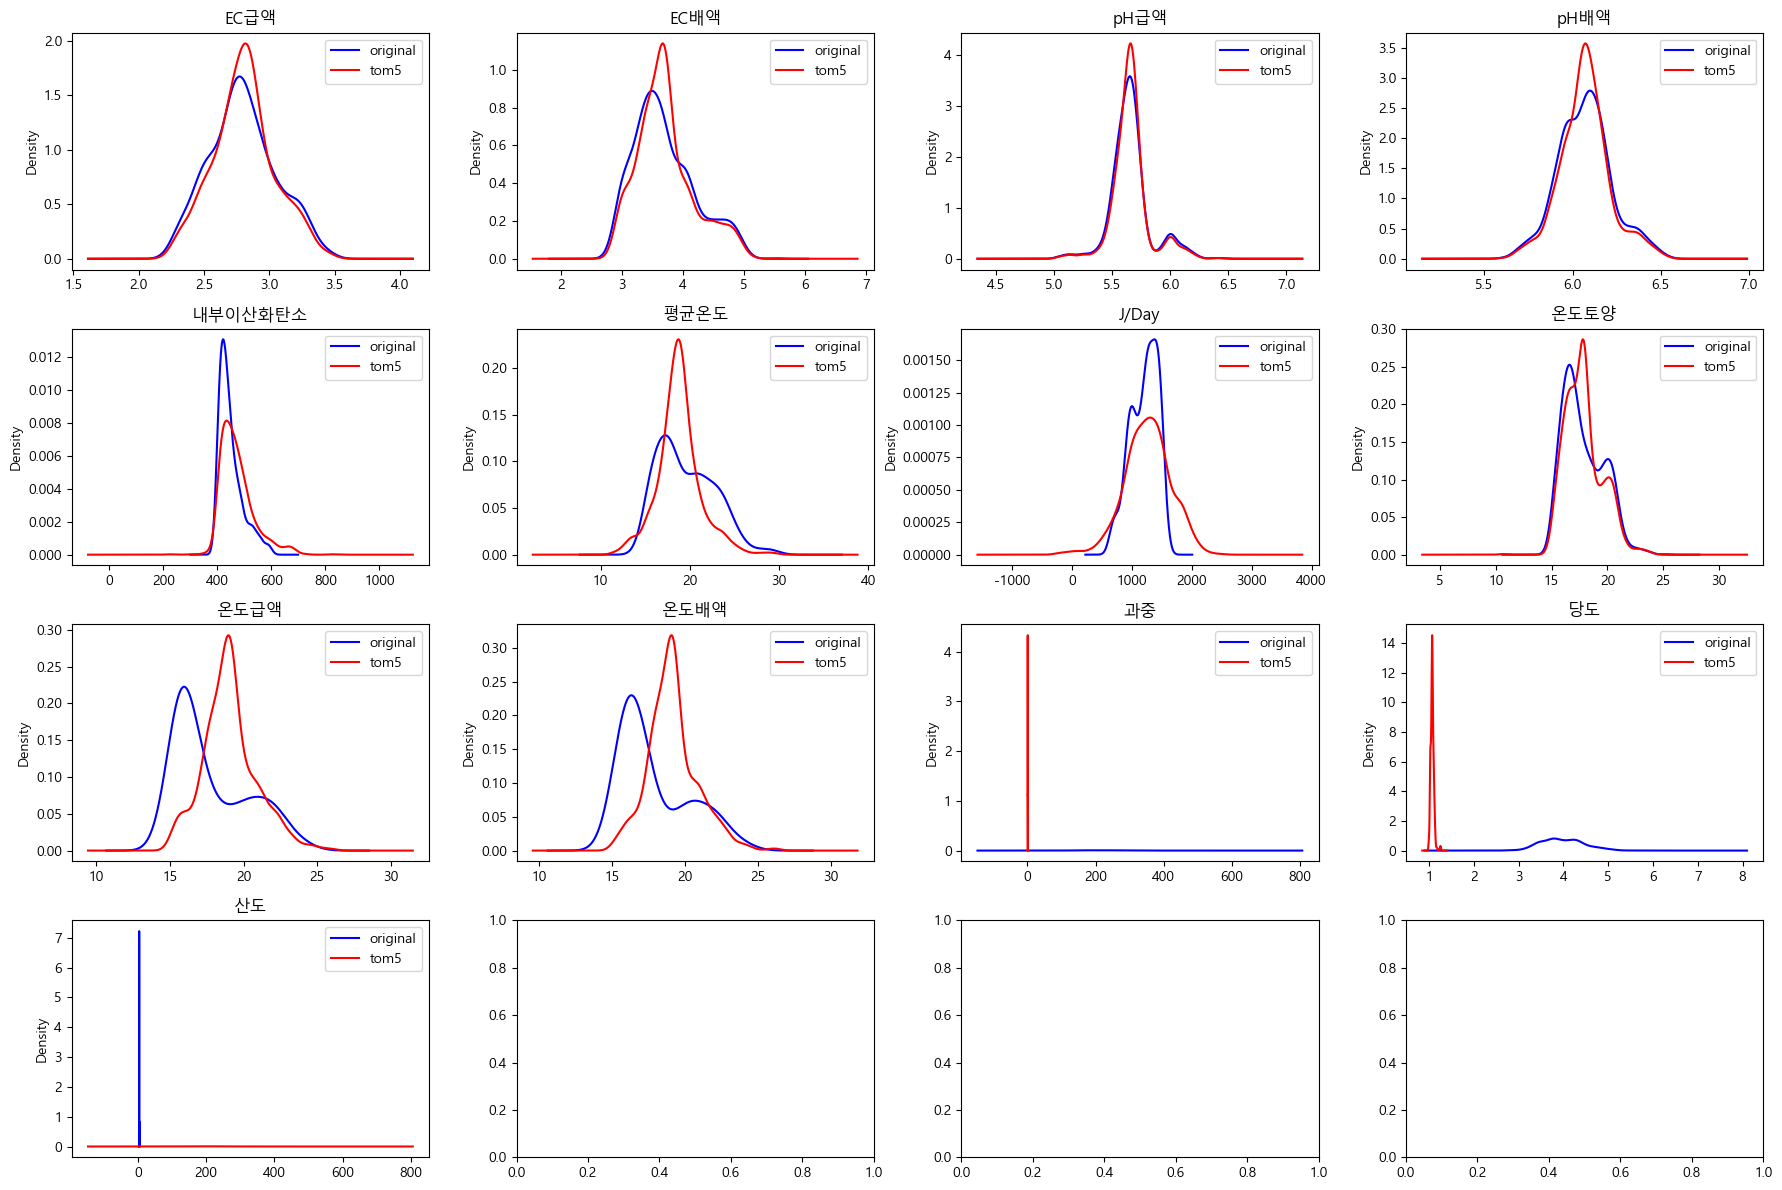

In [96]:
fig, axis = plt.subplots(nrows = 4, ncols = 4, figsize = (18, 12))

for i, (column1, column2) in enumerate(zip(tom_origin.columns, tom5_df.columns)):
    ax = axis[i//4, i%4]
    tom_origin[column1].plot(kind = "kde", ax = ax, color = "blue", label = 'original')
    tom5_df[column2].plot(kind = "kde", ax = ax, color = "red", label = "tom5")
    ax.set_title(column1)
    ax.legend()
    
plt.tight_layout()

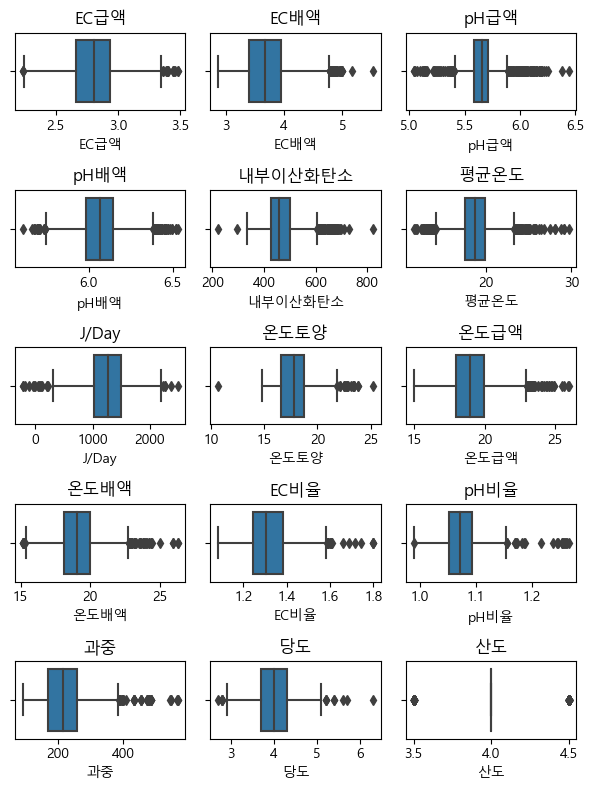

In [97]:
# boxplot 이상치 확인
plt.figure(figsize = (6, 8))
for i in range(len(tom5_df.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(tom5_df[tom5_df.columns[i]])
    plt.title(tom5_df.columns[i])
plt.tight_layout()

### 뿔린 5번 농장(난수 data 대입) scale Checkpoint

In [98]:
X = tom5_df[tom5_df.columns[:-3]]
y = tom5_df[tom5_df.columns[-3:]]
scaler = StandardScaler()
tom5_X_scaler = scaler.fit_transform(X)
tom5_X_scaler = pd.DataFrame(tom5_X_scaler, columns = tom5_df.columns[:-3])

In [99]:
tom5_scale = pd.concat([tom5_X_scaler, y], axis = 1)
tom5_scale

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,0.597199,-0.373564,-0.354001,-2.184296,-0.759872,2.803361,-0.019361,1.378954,2.101173,2.329098,-1.146013,-1.248976,205.0,4.1,4.0
1,-1.443517,-0.634311,0.391467,-0.994604,0.006268,-0.663663,-1.006403,-0.965415,-0.709139,-0.878371,0.600219,-1.031405,210.0,4.7,4.0
2,0.383518,-0.148909,-0.168048,-0.283072,-0.802481,0.365265,0.418460,0.030756,0.276329,0.231966,-0.605370,-0.074580,205.0,4.7,4.0
3,0.677353,-0.164082,-0.197336,-0.353368,-1.075882,0.335437,0.717941,0.036067,0.293091,0.251966,-0.905701,-0.098732,206.0,4.7,4.5
4,-0.797756,-0.741555,0.838362,-0.774241,-0.672983,-0.689246,0.797336,-1.466335,-1.104682,-1.196250,-0.342611,-1.239467,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,-1.532576,-0.013337,-0.339688,0.712511,0.184622,1.091147,-3.821398,1.427847,1.805035,1.506773,1.836969,0.770042,148.0,4.5,4.0
1192,-1.669652,-0.139314,-0.194123,0.871241,-0.044264,0.836477,-3.569149,0.877830,1.400184,1.080911,1.797833,0.753448,142.0,4.6,4.0
1193,-1.722646,-0.193406,-0.184831,0.954721,0.021544,0.629631,-3.086205,0.486305,1.002024,0.720340,1.772481,0.803585,151.0,4.5,3.5
1194,-1.754442,-0.214402,-0.088820,0.860659,0.075334,0.411537,-2.754104,0.129345,0.648696,0.402524,1.778342,0.654244,145.0,4.3,3.5


In [100]:
tom5_scale.to_csv("tomato_farm_set/tom5_scale.csv", encoding = "utf-8")

# 3. Model 구축 및 학습

## 1)  KNN

### (1) mean

In [103]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

In [104]:
# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [105]:
# 데이터 분리
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

In [106]:
from scipy.stats import randint, uniform
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_w, y_train_w)


pred = random_knn.predict(X_test_w)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_w, y_test_w))
print("rmse : ", rmse)

<과중>
파라미터 :  {'n_neighbors': 10}
점수 :  0.12139120345165282
테스트 점수:  0.1422468929823495
rmse :  61.5376927175532


In [107]:
# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_s, y_train_s)

pred = random_knn.predict(X_test_s)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))
print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_s, y_test_s))
print("rmse : ", rmse)

<당도>
파라미터 :  {'n_neighbors': 6}
점수 :  0.37312327008941326
테스트 점수:  0.3797779518204043
rmse :  0.3672601932377603


In [108]:
# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_p, y_train_p)

pred = random_knn.predict(X_test_p)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))
print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_p, y_test_p))
print("rmse : ", rmse)

<산도>
파라미터 :  {'n_neighbors': 9}
점수 :  -0.13636978782917725
테스트 점수:  -0.13590513590513553
rmse :  0.18860272440853282


### (2) median

In [109]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분리
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_w, y_train_w)

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_w, y_test_w))

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_s, y_train_s)

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_s, y_test_s))

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_p, y_train_p)

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_p, y_test_p))

<과중>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  0.10728721554252488
테스트 점수:  0.10940472748645391
<당도>
파라미터 :  {'n_neighbors': 5}
점수 :  0.3833144079963695
테스트 점수:  0.3710162833885855
<산도>
파라미터 :  {'n_neighbors': 9}
점수 :  -0.12795403000299235
테스트 점수:  -0.11455044788378088


### (3) knn imputer

In [110]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 데이터 분리
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_w, y_train_w)

pred = random_knn.predict(X_test_w)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_w, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_s, y_train_s)

pred = random_knn.predict(X_test_s)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_s, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train_p, y_train_p)

pred = random_knn.predict(X_test_p)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test_p, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  0.2654617805355151
테스트 점수:  0.35268512174578426
rmse :  53.45863354033659
--------------------------------------------------------
<당도>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  0.316932199801772
테스트 점수:  0.2733307442964724
rmse :  0.39752884884831535
--------------------------------------------------------
<산도>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  -0.1047910561531725
테스트 점수:  -0.08274428274428236
rmse :  0.18413649828320292


### (4) Multi imputer

In [111]:
# mul_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_w)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_s)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_p)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  0.22554627411069966
테스트 점수:  0.27506420297408873
rmse :  56.5730810545086
--------------------------------------------------------
<당도>
파라미터 :  {'n_neighbors': 6}
훈련 점수 :  0.5210562944917807
테스트 점수:  0.503587109543193
rmse :  0.3285653664037036
--------------------------------------------------------
<산도>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  -0.057415727287796516
테스트 점수:  -0.10569646569646562
rmse :  0.18607794065928393


### (5) 5번 농장(난수 data 대입)

In [112]:
# mul_imputer
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_neighbors" : randint(low = 1, high = 11)}

# 과중
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_w)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_s)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
random_knn = RandomizedSearchCV(KNeighborsRegressor(), params, cv = 5, n_iter=10)
random_knn.fit(X_train, y_train_p)

pred = random_knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_knn.best_params_)
print("훈련 점수 : ", random_knn.best_score_)
print("테스트 점수: ", random_knn.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  0.22554627411069966
테스트 점수:  0.27506420297408873
rmse :  56.5730810545086
--------------------------------------------------------
<당도>
파라미터 :  {'n_neighbors': 5}
훈련 점수 :  0.5143654604782005
테스트 점수:  0.49806902371972317
rmse :  0.3303864726851469
--------------------------------------------------------
<산도>
파라미터 :  {'n_neighbors': 10}
훈련 점수 :  -0.057415727287796516
테스트 점수:  -0.10569646569646562
rmse :  0.18607794065928393


## 2) Linear

### (1) mean

In [113]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_w))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_s))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_p))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_p))

<과중>
훈련 점수 :  0.13087310326136836
테스트 점수:  0.17542216404933908
----------------------------------------------------
<당도>
훈련 점수 :  0.11830514518761104
테스트 점수:  0.09915779420140136
----------------------------------------------------
<산도>
훈련 점수 :  0.007845961967577253
테스트 점수:  -0.03182718391082773


### (2) median

In [114]:
# tom_medain
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_w))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_s))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train_scaler, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train_scaler, y_train_p))
print("테스트 점수: ", linear_model.score(X_test_scaler, y_test_p))

<과중>
훈련 점수 :  0.1268216585402
테스트 점수:  0.1515068323429405
----------------------------------------------------
<당도>
훈련 점수 :  0.105981881756684
테스트 점수:  0.0764955989578775
----------------------------------------------------
<산도>
훈련 점수 :  0.009333739190571011
테스트 점수:  -0.03847978052034229


### (3) knn imputer

In [115]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_w)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_w))
print("테스트 점수: ", linear_model.score(X_test, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_s)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_s))
print("테스트 점수: ", linear_model.score(X_test, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_p)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_p))
print("테스트 점수: ", linear_model.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
훈련 점수 :  0.21955375480491435
테스트 점수:  0.26164008977825803
rmse :  57.094478844892755
--------------------------------------------------------
<당도>
훈련 점수 :  0.13225018494425256
테스트 점수:  0.08105772893939
rmse :  0.44703792919820917
--------------------------------------------------------
<산도>
훈련 점수 :  0.007837842837463693
테스트 점수:  -0.02741173519265816
rmse :  0.17936974524599691


### (4) Multi imputer

In [116]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_w)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_w))
print("테스트 점수: ", linear_model.score(X_test, y_test_w))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_s)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_s))
print("테스트 점수: ", linear_model.score(X_test, y_test_s))
print("rmse : ", rmse)
print("--------------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_p)

pred = linear_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_p))
print("테스트 점수: ", linear_model.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
훈련 점수 :  0.2918147261953037
테스트 점수:  0.2628959450621655
rmse :  57.04590299655292
--------------------------------------------------------
<당도>
훈련 점수 :  0.780182658000173
테스트 점수:  0.7144898733234201
rmse :  224.86000281058492
--------------------------------------------------------
<과중>
훈련 점수 :  0.1866624601250516
테스트 점수:  0.10054882790169373
rmse :  0.16782850516848705


### (5) 5번 농장(난수 data 대입)

In [117]:
# knn_imputer
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 과중
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_w)

print("<과중>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_w))
print("테스트 점수: ", linear_model.score(X_test, y_test_w))
print("--------------------------------------------------------")

# 당도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_s)

print("<당도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_s))
print("테스트 점수: ", linear_model.score(X_test, y_test_s))
print("--------------------------------------------------------")

# 산도
linear_model = LinearRegression()
linear_model.fit(X_train, y_train_p)

print("<산도>")
print("훈련 점수 : ", linear_model.score(X_train, y_train_p))
print("테스트 점수: ", linear_model.score(X_test, y_test_p))

<과중>
훈련 점수 :  0.2918147261953037
테스트 점수:  0.2628959450621655
--------------------------------------------------------
<당도>
훈련 점수 :  0.780182658000173
테스트 점수:  0.7144898733234201
--------------------------------------------------------
<산도>
훈련 점수 :  0.1866624601250516
테스트 점수:  0.10054882790169373


## 3) Ridge

### (1) mean

In [118]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_w)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")


# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_s)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_p)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.09306866837907193
테스트 점수:  0.1757692684955049
rmse :  60.32321233159469
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.09118301030357465
테스트 점수:  0.09993098333045258
rmse :  0.4424234764710914
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.00746098781243858
테스트 점수:  -0.013910414062584975
rmse :  0.17818728976006673


### (2) median

In [119]:
# tom_mean
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_w)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_s)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train_scaler, y_train_p)

pred = grid_ridge.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 1.0}
훈련 점수 :  0.08543197561074481
테스트 점수:  0.14465316067949896
rmse :  61.45131578873509
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.07922778166997943
테스트 점수:  0.07676577017362118
rmse :  0.4480806678610517
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.0067218906907941635
테스트 점수:  -0.016388843065631153
rmse :  0.1784049396581778


### (3) Knn imputer

In [120]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_p)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 1.0}
훈련 점수 :  0.189083700892051
테스트 점수:  0.25904318162279105
rmse :  57.194795082270375
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.11242819370003383
테스트 점수:  0.08137497971805197
rmse :  0.4469607560295146
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0}
훈련 점수 :  -0.006011541817461263
테스트 점수:  -0.013236965388354172
rmse :  0.17812810310743651


### (4) Multi imputer

In [121]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_p)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.25245148872231216
테스트 점수:  0.26799378354926195
rmse :  56.84829496639076
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.7555421327966129
테스트 점수:  0.7181277184432244
rmse :  0.24758620520192148
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.15487161595138324
테스트 점수:  0.10296229878375551
rmse :  0.16760318927458961


### (5) 5번 농장(난수 data 대입)

In [122]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)
# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)]}

# 과중
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_w)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_s)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_ridge = GridSearchCV(Ridge(), params, cv = 5)
grid_ridge.fit(X_train, y_train_p)

pred = grid_ridge.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_ridge.best_params_)
print("훈련 점수 : ", grid_ridge.best_score_)
print("테스트 점수: ", grid_ridge.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.25245148872231216
테스트 점수:  0.26799378354926195
rmse :  56.84829496639076
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.7555421327966129
테스트 점수:  0.7181277184432244
rmse :  0.24758620520192148
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.1}
훈련 점수 :  0.15487161595138324
테스트 점수:  0.10296229878375551
rmse :  0.16760318927458961


## 4) ElasticNet

### (1) mean

In [123]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_w)

pred = grid_elastic.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_s)

pred = grid_elastic.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_p)

pred = grid_elastic.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.001, 'l1_ratio': 0.5}
훈련 점수 :  0.09419475563578898
테스트 점수:  0.17481302240374985
rmse :  60.358194717468876
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.09119951289752426
테스트 점수:  0.100371723661695
rmse :  0.44231514158640073
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0, 'l1_ratio': 1.0}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse :  0.17732598989002088


### (2) median

In [124]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test_scaler, y_test_p))

<과중>
파라미터 :  {'alpha': 0.001, 'l1_ratio': 0.5}
훈련 점수 :  0.08641548737276528
테스트 점수:  0.14824511214016522
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.07933498198348551
테스트 점수:  0.07691865039287926
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 1000.0, 'l1_ratio': 1.0}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155


### (3) knn imputer

In [125]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_w)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_s)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_p)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.001, 'l1_ratio': 0.2}
훈련 점수 :  0.1894036011443594
테스트 점수:  0.259819597898984
rmse :  57.16482126473914
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 0.3}
훈련 점수 :  0.11238621886239415
테스트 점수:  0.08142116971538116
rmse :  0.44694951892231877
----------------------------------------------------
<과중>
파라미터 :  {'alpha': 1000.0, 'l1_ratio': 1.0}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse :  0.17732598989002088


### (4) Multi imputer

In [126]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_w)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_s)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("rmse : ", rmse)
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_p)

pred = grid_elastic.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))
print("rmse : ", rmse)

<과중>
파라미터 :  {'alpha': 0.001, 'l1_ratio': 0.4}
훈련 점수 :  0.2563392272334851
테스트 점수:  0.28350398186794645
rmse :  56.24280207083005
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 0.1}
훈련 점수 :  0.7567406732491776
테스트 점수:  0.7211726738213555
rmse :  0.24624528582141061
----------------------------------------------------
<과중>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.15618416112037622
테스트 점수:  0.1023146285726384
rmse :  0.1676636839483753


### (5) 5번 농장(난수 data 대입)

In [127]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"alpha" : [round(1000*0.1**i, i) for i in range(8)],
         "l1_ratio" : [round((1 - (0.1*i)), 1) for i in range(10)]}

# 과중
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
grid_elastic = GridSearchCV(ElasticNet(), params, cv = 5)
grid_elastic.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", grid_elastic.best_params_)
print("훈련 점수 : ", grid_elastic.best_score_)
print("테스트 점수: ", grid_elastic.score(X_test, y_test_p))

<과중>
파라미터 :  {'alpha': 0.001, 'l1_ratio': 0.4}
훈련 점수 :  0.2563392272334851
테스트 점수:  0.28350398186794645
----------------------------------------------------
<당도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 0.1}
훈련 점수 :  0.7567406732491776
테스트 점수:  0.7211726738213555
----------------------------------------------------
<산도>
파라미터 :  {'alpha': 0.0001, 'l1_ratio': 1.0}
훈련 점수 :  0.15618416112037622
테스트 점수:  0.1023146285726384


## 5) AdaBoost

### (1) mean

In [128]:
tom_mean

,EC급액,EC배액,pH급액,pH배액,내부이산화탄소,평균온도,J/Day,온도토양,온도급액,온도배액,EC비율,pH비율,과중,당도,산도
0,2.798473,3.696225,5.604356,5.761377,425.869110,25.610524,1255.000000,17.832078,17.785468,17.899151,1.320801,1.028018,205.0,4.1,4.0
1,2.798473,3.696225,5.724704,5.930016,473.792000,17.171600,874.000000,17.832078,17.785468,17.899151,1.320801,1.035864,210.0,4.7,4.0
2,2.798473,3.696225,5.659589,6.070746,449.176518,19.640756,1424.000000,17.832078,17.785468,17.899151,1.320801,1.072648,205.0,4.7,4.0
3,2.798473,3.696225,5.659589,6.070746,449.176518,19.640756,1539.600000,17.832078,17.785468,17.899151,1.320801,1.072648,206.0,4.7,4.5
4,2.798473,3.696225,5.796851,5.961253,431.304124,17.109330,1199.904646,17.832078,17.785468,17.899151,1.320801,1.028361,223.0,4.3,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2.444833,3.705833,5.606667,6.172000,449.176518,19.640756,1199.904646,20.227000,17.785468,17.899151,1.515782,1.100832,148.0,4.5,4.0
1192,2.412500,3.646833,5.630167,6.194500,449.176518,19.640756,1199.904646,19.312000,17.785468,17.899151,1.511641,1.100234,142.0,4.6,4.0
1193,2.400000,3.621500,5.631667,6.206333,449.176518,19.640756,1199.904646,18.660667,17.785468,17.899151,1.508958,1.102042,151.0,4.5,3.5
1194,2.392500,3.611667,5.647167,6.193000,449.176518,19.640756,1199.904646,18.066833,17.785468,17.899151,1.509579,1.096656,145.0,4.3,3.5


In [129]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_p))

<과중>
파라미터 :  {'n_estimators': 573}
훈련 점수 :  0.07788897390902287
테스트 점수:  0.11594882564783482
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 125}
훈련 점수 :  0.1137845931004667
테스트 점수:  0.09591632017566187
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 487}
훈련 점수 :  -0.048708719509957324
테스트 점수:  -0.010904529174359912


### (2) median

In [130]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train_scaler, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test_scaler, y_test_p))

<과중>
파라미터 :  {'n_estimators': 11}
훈련 점수 :  0.14780943636354055
테스트 점수:  0.12929260316478086
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 95}
훈련 점수 :  0.1868205712358047
테스트 점수:  0.16630280388899643
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 342}
훈련 점수 :  -0.04216227156808252
테스트 점수:  -0.010897695804544805


### (3) knn imputer

In [131]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_estimators': 34}
훈련 점수 :  0.3348607510612513
테스트 점수:  0.20917797473723554
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 81}
훈련 점수 :  0.1966774774710634
테스트 점수:  0.14431112461419826
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 512}
훈련 점수 :  -0.054464843733975775
테스트 점수:  -0.015054071895589383


### (4) Multi imputer

In [132]:
# mul_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_estimators': 121}
훈련 점수 :  0.16176288206008135
테스트 점수:  0.11319099450134662
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 756}
훈련 점수 :  0.3765314487212418
테스트 점수:  0.3261330780225611
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 835}
훈련 점수 :  -0.05763682017699741
테스트 점수:  -0.20171770131897482


### (5) 5번 농장(난수 data 대입)

In [133]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 1000)}

# 과중
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_w)

print("<과중>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_w))
print("----------------------------------------------------")

# 당도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_s)

print("<당도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_s))
print("----------------------------------------------------")

# 산도
random_ada = RandomizedSearchCV(AdaBoostRegressor(random_state = 0), params, cv = 5)
random_ada.fit(X_train, y_train_p)

print("<산도>")
print("파라미터 : ", random_ada.best_params_)
print("훈련 점수 : ", random_ada.best_score_)
print("테스트 점수: ", random_ada.score(X_test, y_test_p))

<과중>
파라미터 :  {'n_estimators': 57}
훈련 점수 :  0.1721030637768775
테스트 점수:  0.18798065143553055
----------------------------------------------------
<당도>
파라미터 :  {'n_estimators': 831}
훈련 점수 :  0.37615009124048393
테스트 점수:  0.3247372893819219
----------------------------------------------------
<산도>
파라미터 :  {'n_estimators': 829}
훈련 점수 :  -0.05763682017699741
테스트 점수:  -0.20171770131897482


## 6) GradientBoost

### (1) mean

In [134]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_w)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_s)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_p)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 12}
훈련 점수 :  0.15563426584629608
테스트 점수:  0.20543443046388077
rmse : 59.22770846109422
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 89}
훈련 점수 :  0.323300821928101
테스트 점수:  0.39984500935277667
rmse : 0.36127005807917034
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 89}
훈련 점수 :  -0.004597686396238343
테스트 점수:  -0.004073035558083804
rmse : 0.17732075935840844


### (2) median

In [135]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_w)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_s)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train_scaler, y_train_p)

pred = random_grad.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 69}
훈련 점수 :  0.14040171792880976
테스트 점수:  0.18892658762848535
rmse : 59.839801123484584
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75}
훈련 점수 :  0.3409619782829517
테스트 점수:  0.3983972342686486
rmse : 0.36170554786192377
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.0001, 'max_depth': 8, 'n_estimators': 28}
훈련 점수 :  -0.0043942249126827536
테스트 점수:  -0.00448453208577293
rmse : 0.17735709107918804


### (3) knn imputer

In [136]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_w)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_s)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_p)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 35}
훈련 점수 :  0.4349112311004685
테스트 점수:  0.35992909331797407
rmse : 53.15866952217293
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 51}
훈련 점수 :  0.1930602629254326
테스트 점수:  0.31456938544569735
rmse : 0.3860841804473031
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.0001, 'max_depth': 11, 'n_estimators': 61}
훈련 점수 :  -0.004594621712696134
테스트 점수:  -0.0037071695855908082
rmse : 0.17728845018331832


### (4) Multi imputer

In [137]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_w)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_s)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_p)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 36}
훈련 점수 :  0.19526577101278578
테스트 점수:  0.29644491670372064
rmse : 55.73257530969781
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 91}
훈련 점수 :  0.5436429445515916
테스트 점수:  0.5092728007723636
rmse : 0.32667832713788963
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 39}
훈련 점수 :  0.008278557911755935
테스트 점수:  0.004764796598426213
rmse : 0.1765386475105493


### (5) 5번 농장(난수 data 대입)

In [138]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 100),
         "learning_rate" : [round(1*0.1**i, i) for i in range(5)],
         "max_depth" : range(1, 12)}

# 과중
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_w)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_s)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
random_grad = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
random_grad.fit(X_train, y_train_p)

pred = random_grad.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", random_grad.best_params_)
print("훈련 점수 : ", random_grad.best_score_)
print("테스트 점수: ", random_grad.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 99}
훈련 점수 :  0.21321259559311406
테스트 점수:  0.3183786203454161
rmse : 54.85695042903255
----------------------------------------------------
<당도>
파라미터 :  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 83}
훈련 점수 :  0.5094802808449868
테스트 점수:  0.49422183524084695
rmse : 0.3316502248594876
----------------------------------------------------
<산도>
파라미터 :  {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 75}
훈련 점수 :  0.006229408027804561
테스트 점수:  -0.015756255290388266
rmse : 0.1783494125091579


## 7) Randomforest

### (1) mean

In [139]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_w)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_s)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_p)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 4, 'n_estimators': 191}
훈련 점수 :  0.14912353399533423
테스트 점수:  0.24990411259604206
rmse : 57.54643855511908
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 6, 'n_estimators': 149}
훈련 점수 :  0.3421118130063153
테스트 점수:  0.35675211249896976
rmse : 0.37401536359624804
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 7, 'n_estimators': 45}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (2) median

In [140]:
# tom_mean
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_w)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_s)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train_scaler, y_train_p)

pred = rnf_model.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 5, 'n_estimators': 167}
훈련 점수 :  0.16683084245665736
테스트 점수:  0.22828371902018596
rmse : 58.36989207155522
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 6, 'n_estimators': 191}
훈련 점수 :  0.3299273734668108
테스트 점수:  0.3728147159902616
rmse : 0.36931605500278053
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 8, 'n_estimators': 191}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (3) knn imputer

In [141]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_w)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_s)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_p)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 95}
훈련 점수 :  0.5065757408814935
테스트 점수:  0.6190839189741204
rmse : 41.008578245684284
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 4, 'n_estimators': 161}
훈련 점수 :  0.32544837560249384
테스트 점수:  0.28103727007707713
rmse : 0.395415279197788
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 2, 'n_estimators': 141}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (4) Multi inputer

In [142]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_w)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_s)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_p)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 6, 'n_estimators': 68}
훈련 점수 :  0.2552210932942959
테스트 점수:  0.3105132175497495
rmse : 55.172546768809156
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 10, 'n_estimators': 187}
훈련 점수 :  0.5074420556240533
테스트 점수:  0.47307089978604977
rmse : 0.33851377798256416
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 6, 'n_estimators': 158}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


### (5) 5번 농장(난수 data 대입)

In [143]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"n_estimators" : randint(low = 10, high = 200),
         "criterion" : ["squared_error", "absolute_error", "poisson"],
         "max_depth" : range(1, 12)}


# 과중
rnf_model = RandomizedSearchCV(RandomForestRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_w)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_s)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
rnf_model = RandomizedSearchCV(GradientBoostingRegressor(random_state=0), params, cv = 5)
rnf_model.fit(X_train, y_train_p)

pred = rnf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", rnf_model.best_params_)
print("훈련 점수 : ", rnf_model.best_score_)
print("테스트 점수: ", rnf_model.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'criterion': 'squared_error', 'max_depth': 10, 'n_estimators': 87}
훈련 점수 :  0.26463419528492127
테스트 점수:  0.3393463732218235
rmse : 54.00661661994428
----------------------------------------------------
<당도>
파라미터 :  {'criterion': 'absolute_error', 'max_depth': 8, 'n_estimators': 100}
훈련 점수 :  0.5169047291192099
테스트 점수:  0.46903311191778285
rmse : 0.33980829589653483
----------------------------------------------------
<산도>
파라미터 :  {'criterion': 'poisson', 'max_depth': 3, 'n_estimators': 181}
훈련 점수 :  -0.004335476075712119
테스트 점수:  -0.0041322718621790155
rmse : 0.17732598989002088


## 8) SVR

In [144]:
# 1) 과중
# plt.figure(figsize = (5, 5))
# for i in range(len([col for col in tom_knn_9.columns if "pH" in col])):
#     sns.lmplot([col for col in tom_knn_9.columns if "pH" in col][i], "과중", data = tom_knn_9, fit_reg = True)
#     plt.title([col for col in tom_knn_9.columns if "pH" in col][i])
# plt.tight_layout()    

### (1) mean

In [145]:
# tom_mean
X = tom_mean[tom_mean.columns[:-3]]
y_w = tom_mean[tom_mean.columns[-3]]
y_s = tom_mean[tom_mean.columns[-2]]
y_p = tom_mean[tom_mean.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}


# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_w)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_s)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_p)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 100.0, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  0.1135475796408767
테스트 점수:  0.15876050931824615
rmse : 60.94244651038408
----------------------------------------------------
<당도>
파라미터 :  {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  0.3576696361155104
테스트 점수:  0.2751360967069799
rmse : 0.3970347272317193
----------------------------------------------------
<산도>
파라미터 :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  -0.13247721802387913
테스트 점수:  -0.10748763294104435
rmse : 0.1862285976665343


### (2) median

In [146]:
# tom_median
X = tom_median[tom_median.columns[:-3]]
y_w = tom_median[tom_median.columns[-3]]
y_s = tom_median[tom_median.columns[-2]]
y_p = tom_median[tom_median.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)

# scaling
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}


# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_w)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_s)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train_scaler, y_train_p)

pred = grid_svr.predict(X_test_scaler)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test_scaler, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 100.0, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.1012860695037979
테스트 점수:  0.132274953926925
rmse : 61.89436696815095
----------------------------------------------------
<당도>
파라미터 :  {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  0.3502535277175284
테스트 점수:  0.27757218399392514
rmse : 0.39636699825900257
----------------------------------------------------
<산도>
파라미터 :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  -0.13383635512023315
테스트 점수:  -0.11039348771085589
rmse : 0.18647275332780858


### (3) knn imputer

In [147]:
# knn_imputer
X = tom_knn_scale[tom_knn_scale.columns[:-3]]
y_w = tom_knn_scale[tom_knn_scale.columns[-3]]
y_s = tom_knn_scale[tom_knn_scale.columns[-2]]
y_p = tom_knn_scale[tom_knn_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}

# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_w)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_s)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_p)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 100.0, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.3290591710091363
테스트 점수:  0.3798993538989933
rmse : 52.322820975419155
----------------------------------------------------
<당도>
파라미터 :  {'C': 1.0, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.34766364850968384
테스트 점수:  0.23377656705933736
rmse : 0.40820467365652013
----------------------------------------------------
<산도>
파라미터 :  {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  -0.12100705540483792
테스트 점수:  -0.0938457571803577
rmse : 0.18507807495316478


### (4) Multi imputer

In [148]:
# multi_imputer
X = tom_mul_scale[tom_mul_scale.columns[:-3]]
y_w = tom_mul_scale[tom_mul_scale.columns[-3]]
y_s = tom_mul_scale[tom_mul_scale.columns[-2]]
y_p = tom_mul_scale[tom_mul_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}

# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_w)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_s)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_p)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 100.0, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.24999413951886157
테스트 점수:  0.2763625540338821
rmse : 56.522397506179956
----------------------------------------------------
<당도>
파라미터 :  {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  0.7850628155052629
테스트 점수:  0.7690867672848773
rmse : 0.22409113105398093
----------------------------------------------------
<산도>
파라미터 :  {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
훈련 점수 :  0.13534416031831759
테스트 점수:  0.10317703581374127
rmse : 0.16758312726092522


### (5) 5번 농장(난수 data 대입)

In [149]:
# tom5
X = tom5_scale[tom5_scale.columns[:-3]]
y_w = tom5_scale[tom5_scale.columns[-3]]
y_s = tom5_scale[tom5_scale.columns[-2]]
y_p = tom5_scale[tom5_scale.columns[-1]]

# 데이터 분리
X_train, X_test, y_train_w, y_test_w = train_test_split(X, y_w, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_s, 
                                                        random_state=0,
                                                       test_size=0.2)
X_train, X_test, y_train_p, y_test_p = train_test_split(X, y_p, 
                                                        random_state=0,
                                                       test_size=0.2)


# 파라미터
params = {"C" : [round(100*0.1**i, i) for i in range(8)],
         "gamma" : ['scale', 'auto'],
         "kernel" : ['linear', 'poly', 'rbf']}

# 과중
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_w)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_w, pred))

print("<과중>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_w))
print("rmse :", rmse)
print("----------------------------------------------------")

# 당도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_s)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_s, pred))

print("<당도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_s))
print("rmse :", rmse)
print("----------------------------------------------------")

# 산도
grid_svr = GridSearchCV(SVR(), params, cv = 5)
grid_svr.fit(X_train, y_train_p)

pred = grid_svr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_p, pred))

print("<산도>")
print("파라미터 : ", grid_svr.best_params_)
print("훈련 점수 : ", grid_svr.best_score_)
print("테스트 점수: ", grid_svr.score(X_test, y_test_p))
print("rmse :", rmse)

<과중>
파라미터 :  {'C': 100.0, 'gamma': 'auto', 'kernel': 'rbf'}
훈련 점수 :  0.24999413951886157
테스트 점수:  0.2763625540338821
rmse : 56.522397506179956
----------------------------------------------------
<당도>
파라미터 :  {'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}
훈련 점수 :  0.7850628155052629
테스트 점수:  0.7690867672848773
rmse : 0.22409113105398093
----------------------------------------------------
<산도>
파라미터 :  {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
훈련 점수 :  0.13534416031831759
테스트 점수:  0.10317703581374127
rmse : 0.16758312726092522
